importing necessary files first

In [1]:
import numpy as np
import os

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

import qp


downloading data files!

In [2]:
base_url = 'https://slac.stanford.edu/~echarles/qp_example'
if not os.path.exists('qp_test_ensemble.hf5'):
    os.system('curl -o %s -OL %s/%s' % ('qp_test_ensemble.hf5', base_url, 'qp_test_ensemble.hf5'))

reading into the ensemble, only need name of data file because the metadata is assumed

In [3]:
ens = qp.read('qp_test_ensemble.hf5')

plotting some pdfs, with the first one defaulting to pdf 0

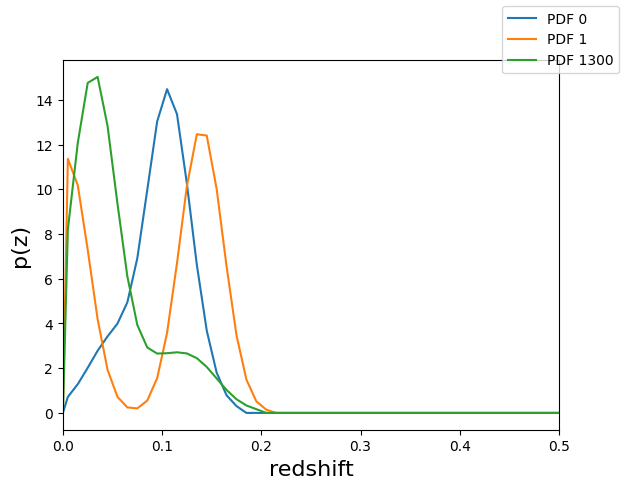

In [4]:
axes = ens.plot(xlim=(0., 0.5), label="PDF 0")
_ = ens.plot(key=1, axes=axes, label="PDF 1")
_ = ens.plot(key=1300, axes=axes, label="PDF 1300")
legend = axes.figure.legend()

expanding grid representation

In [6]:
# Convert to a grid using 51 grid points
ens_g51 = qp.convert(ens, 'interp', xvals=np.linspace(0, 3, 51))

In [7]:
# Convert to a grid using 21 grid points
ens_g21 = qp.convert(ens, 'interp', xvals=np.linspace(0, 1, 21))

/opt/miniconda3/lib/python3.12/site-packages/qp/interp_pdf.py:88: RuntimeWarning: invalid value encountered in divide
  self._yvals = (self._yvals.T / self._ycumul[:, -1]).T
/opt/miniconda3/lib/python3.12/site-packages/qp/interp_pdf.py:89: RuntimeWarning: invalid value encountered in divide
  self._ycumul = (self._ycumul.T / self._ycumul[:, -1]).T


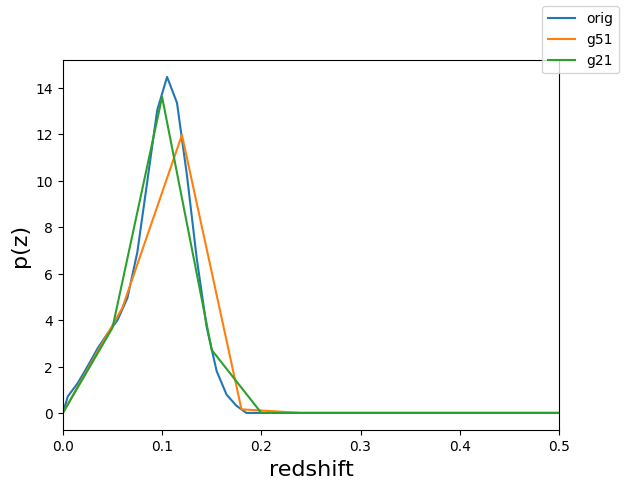

In [8]:
key = 0
axes_g = ens.plot(key, xlim=(0, 0.5), label="orig")
_ = ens_g51.plot(key, axes=axes_g, label="g51")
_ = ens_g21.plot(key, axes=axes_g, label="g21")
leg_g = axes_g.figure.legend()

converting to spline based representation, first must reduce base ensemble to 100 PDFS instead of 20000 because converting to spline takes a longer time

/opt/miniconda3/lib/python3.12/site-packages/qp/spline_pdf.py:50: RuntimeWarning: invalid value encountered in divide
  return (yvals.T / integrals).T


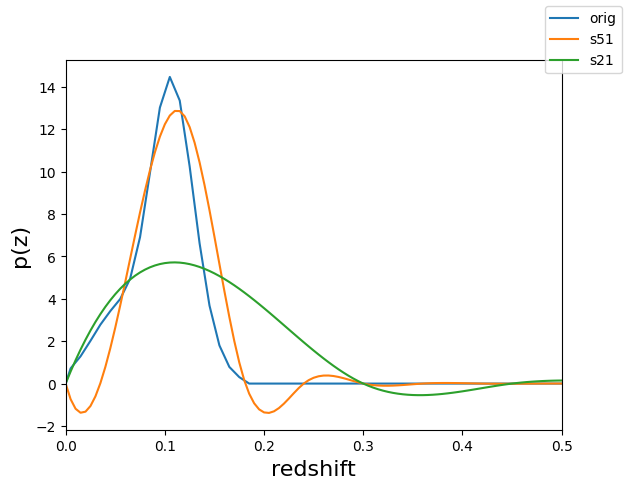

In [9]:
ens_red = ens[np.arange(100)]
ens_s21 = qp.convert(ens_red, 'spline', xvals=np.linspace(0, 3.0, 21), method="xy")
ens_s51 = qp.convert(ens_red, 'spline', xvals=np.linspace(0, 3.0, 51), method="xy")
key = 0
axes_s = ens_red.plot(key, xlim=(0, 0.5), label="orig")
_ = ens_s51.plot(key, axes=axes_s, label="s51")
_ = ens_s21.plot(key, axes=axes_s, label="s21")
leg_s = axes_s.figure.legend()

Now, plotting histogram, quantiles, samples, and spline on same graph using 51 grid points.

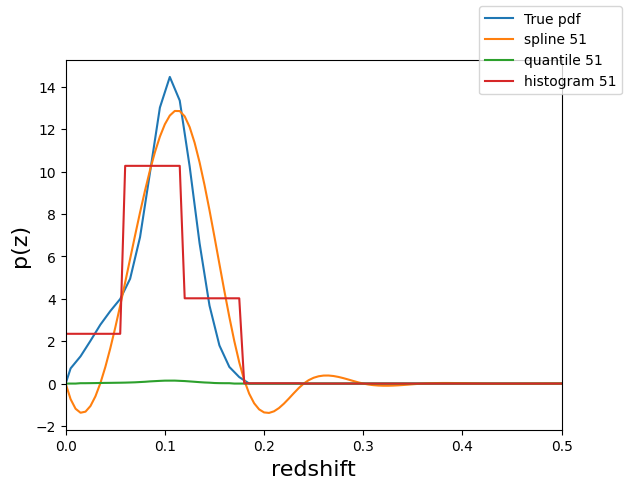

In [10]:
ens_h51 = qp.convert(ens_red, 'hist', bins = np.linspace(0, 3.0, 51))
ens_s51 = qp.convert(ens_red, 'spline', xvals=np.linspace(0, 3.0, 51), method="xy")
ens_q51 = qp.convert(ens_red, 'quant', quants=np.linspace(0.01, 0.99, 51))
key = 0
axes_s = ens_red.plot(key, xlim=(0, 0.5), label="True pdf")
_ = ens_s51.plot(key, axes=axes_s, label="spline 51")
_ = ens_q51.plot(key, axes=axes_s, label="quantile 51")
_ = ens_h51.plot(key, axes=axes_s, label="histogram 51")
leg_s = axes_s.figure.legend()

We can see that using 51 grid points, the quantile model is closest to the true pdf, followed by the spline model and then the histogram model. 

We will now change the grid size to a number less than 51 and a number greater than 51 to see if we can draw any conclusions.

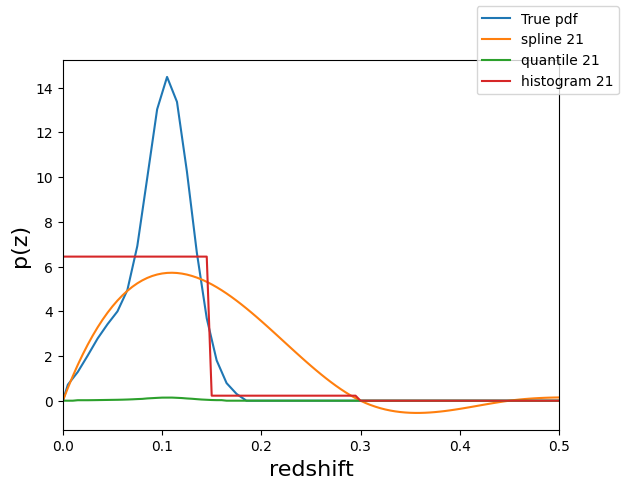

In [11]:
ens_h21 = qp.convert(ens_red, 'hist', bins = np.linspace(0, 3.0, 21))
ens_s21 = qp.convert(ens_red, 'spline', xvals=np.linspace(0, 3.0, 21), method="xy")
ens_q21 = qp.convert(ens_red, 'quant', quants=np.linspace(0.01, 0.99, 21))
key = 0
axes_s = ens_red.plot(key, xlim=(0, 0.5), label="True pdf")
_ = ens_s21.plot(key, axes=axes_s, label="spline 21")
_ = ens_q21.plot(key, axes=axes_s, label="quantile 21")
_ = ens_h21.plot(key, axes=axes_s, label="histogram 21")
leg_s = axes_s.figure.legend()

The above graph is with 21 grid points, now we will try with 100.

/opt/miniconda3/lib/python3.12/site-packages/qp/spline_pdf.py:45: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(spl, limits[0], limits[1], **kwargs)[0]


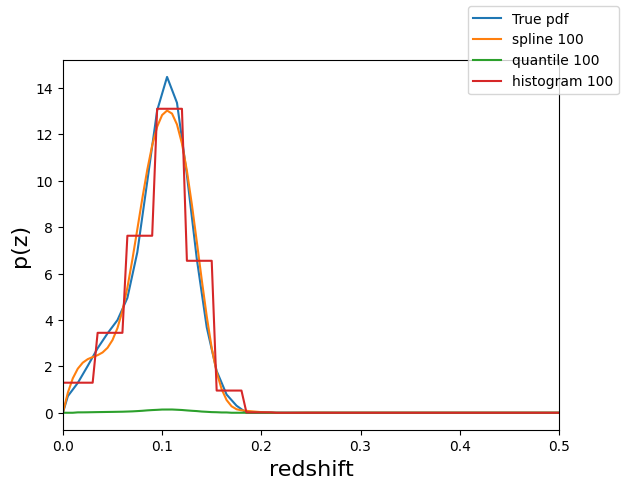

In [12]:
ens_h100 = qp.convert(ens_red, 'hist', bins = np.linspace(0, 3.0, 100))
ens_s100 = qp.convert(ens_red, 'spline', xvals=np.linspace(0, 3.0, 100), method="xy")
ens_q100 = qp.convert(ens_red, 'quant', quants=np.linspace(0.01, 0.99, 100))
key = 0
axes_s = ens_red.plot(key, xlim=(0, 0.5), label="True pdf")
_ = ens_s100.plot(key, axes=axes_s, label="spline 100")
_ = ens_q100.plot(key, axes=axes_s, label="quantile 100")
_ = ens_h100.plot(key, axes=axes_s, label="histogram 100")
leg_s = axes_s.figure.legend()

We can see that as the grid size increases, so does the pdf approximations for all three formats. However, we still see the trend that the spline and quantile parametizations outperform the histogram representation. We note that while using the histogram format, a redshift pdf with a very broad or compact pdf may have many parameters taking the same value that are redundant in storage. 

Now, we will try the interpolated versions of these parametizations, starting with the spline representation

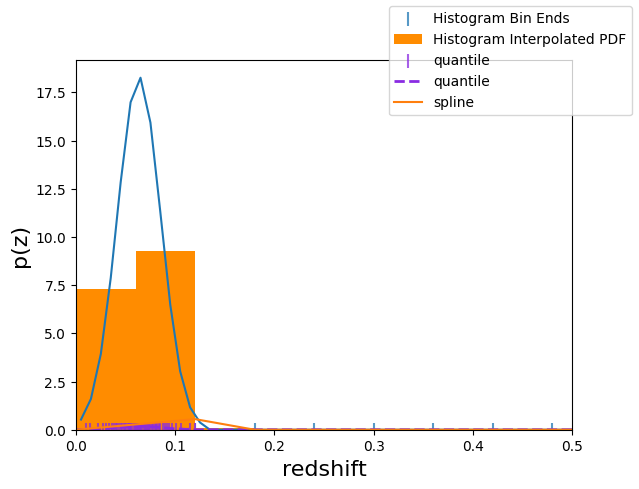

In [13]:
fig, axes = qp.plotting.plot_native(ens_red[15], xlim=(0,0.5))
qp.plotting.plot_native(ens_h51[15], axes=axes)
qp.plotting.plot_native(ens_q51[15], axes=axes, label='quantile')
# qp.plotting.plot_native(ens_i[15], axes=axes, label='interp')
qp.plotting.plot_native(ens_s51[15], axes=axes, label='spline')
leg = fig.legend()

Now, we will look at the KLD, which is a measure of how close two probability distributions are to each other, where a smaller value indicates closer agreement. Here we are comparing 

In [14]:
symm_lims = np.array([-1., 1.])
all_lims = [symm_lims, 2.*symm_lims, 3.*symm_lims]

In [15]:
# for a single pair of pdfs. (the 15th in each ensemble) we are comparing the real one to the spline 21
klds1 = qp.metrics.calculate_kld(ens_red, ens_s21, limits=symm_lims)
klds1 = klds1[~np.isnan(klds1)]
print(klds1)

Negative Values in pn(array([ 0,  0,  0, ..., 99, 99, 99]), array([  0,   1,   2, ..., 197, 198, 199]))
Negative Values in qn(array([ 0,  0,  0, ..., 99, 99, 99]), array([100, 101, 102, ..., 187, 188, 189]))
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. nan nan  1.
  1.  1.  1.  1. nan  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1. nan  1.  1. nan  1.  1.  1. nan nan nan  1.  1.
  1.  1.  1. nan  1.  1. nan  1.  1. nan  1.  1. nan nan  1.  1. nan  1.
  1.  1.  1.  1.  1. nan  1.  1.  1.  1.  1. nan  1.  1. nan nan  1. nan
 nan nan nan nan nan  1. nan  1.  1.  1.]
[0.33665256 0.33591137 0.33879223 0.33639854 0.33977767 0.33795369
 0.3396974  

In [16]:
# for a single pair of pdfs. (the 15th in each ensemble) we are comparing the real one to the histogram 21
klds2 = qp.metrics.calculate_kld(ens_red, ens_h21, limits=symm_lims)
klds2 = klds2[~np.isnan(klds2)]
print(klds2)

Negative Values in pn(array([ 0,  0,  0, ..., 99, 99, 99]), array([  0,   1,   2, ..., 197, 198, 199]))
Negative Values in qn(array([ 0,  0,  0, ..., 99, 99, 99]), array([  0,   1,   2, ..., 197, 198, 199]))
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
[0.00289356 0.0059673  0.00423383 0.00402231 0.0049198  0.00306553
 0.00536954 0.00138276 0.00348228 0.0086274  0.00971862 0.00933348
 0.00573431 0.00569231 0.00568929 0.00525217 0

In [17]:
# for a single pair of pdfs. (the 15th in each ensemble) we are comparing the real one to the quantile 21
klds3 = qp.metrics.calculate_kld(ens_red, ens_q21, limits=symm_lims)
klds3 = klds3[~np.isnan(klds3)]
print(klds3)

Negative Values in pn(array([ 0,  0,  0, ..., 99, 99, 99]), array([  0,   1,   2, ..., 197, 198, 199]))
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
[]


/opt/miniconda3/lib/python3.12/site-packages/qp/quantile_pdf_constructors/piecewise_linear.py:37: RuntimeWarning: divide by zero encountered in divide
  self._cdf_derivatives = (self._quantiles[1:] - self._quantiles[0:-1])/\
/opt/miniconda3/lib/python3.12/site-packages/qp/quant_pdf.py:219: RuntimeWarning: invalid value encountered in divide
  return tmp/sum(tmp)/(max(x)-min(x))
/opt/miniconda3/lib/python3.12/site-packages/qp/metrics/metrics.py:123: RuntimeWarning: invalid value encountered in divide
  qn = (qn.T/qn.sum(1)).T


Trying to plot the spline model with plot native

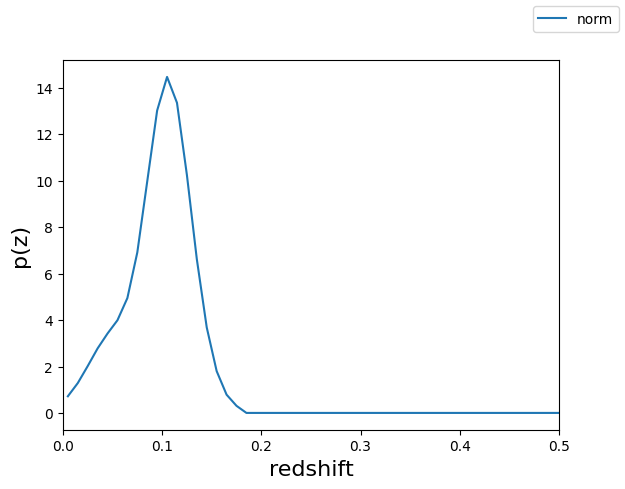

In [18]:
fig, axes = qp.plotting.plot_native(ens_red, xlim=(0.0, 0.5), label="norm")
leg = fig.legend()

Trying something: interpolated set of histograms with shared binning, how to fix this given the ens_red data.

trying to convert ensemble another way as mentioned in the demo using 51 bins

In [21]:
bins = np.linspace(0, 3.0, 51)
quants=np.linspace(0.01, 0.99, 51)
print("Making hist")
ens_h = ens_red.convert_to(qp.hist_gen, bins=bins)
print("Making interp")
ens_i = ens_red.convert_to(qp.interp_gen, xvals=bins)
print("Making spline")
ens_s = ens_red.convert_to(qp.spline_gen, xvals=bins, method="xy")
print("Making quants")
ens_q = ens_red.convert_to(qp.quant_gen, quants=quants)
print("Making mixmod")
ens_m = ens_red.convert_to(qp.mixmod_gen, samples=51, ncomps=3)

Making hist
Making interp
Making spline
Making quants
Making mixmod


plotting these

IndexError: index 15 is out of bounds for axis 0 with size 2

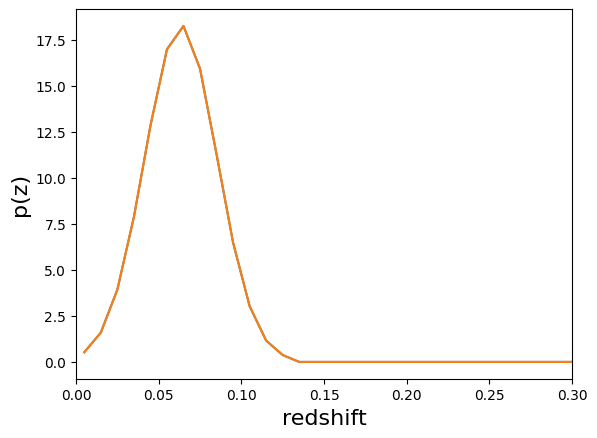

In [168]:
fig, axes = qp.plotting.plot_native(ens_red[15], xlim=(0,0.3))
qp.plotting.plot_native(ens_red[15], axes=axes, label='True PDF')
qp.plotting.plot_native(ens_h[15], axes=axes)
qp.plotting.plot_native(ens_q[15], axes=axes, label='quantile')
qp.plotting.plot_native(ens_i[15], axes=axes, label='interp')
qp.plotting.plot_native(ens_m[15], axes=axes, label='mixmod')
qp.plotting.plot_native(ens_s[15], axes=axes, label='spline')
leg = fig.legend()

From using 51 grids we can see that the quantile representation approximation is closest to the true pdf followed by the samples interpolated then the histogram inteprolated pdf and lastly the spline model.

We will now see how the spline model compares to the Gaussian Mixture Model

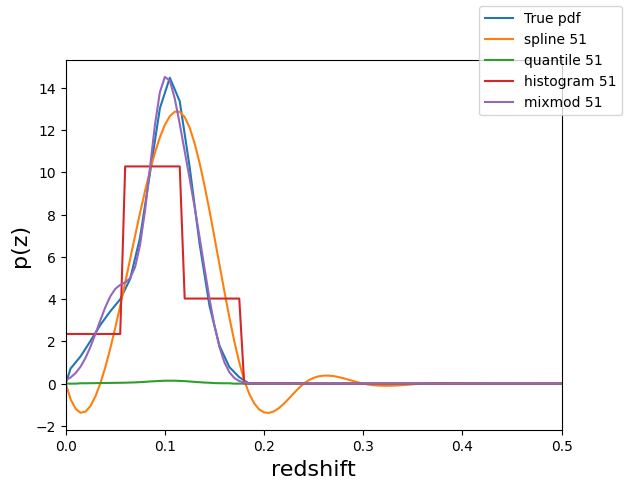

In [23]:
ens_h51 = qp.convert(ens_red, 'hist', bins = np.linspace(0, 3.0, 51))
ens_s51 = qp.convert(ens_red, 'spline', xvals=np.linspace(0, 3.0, 51), method="xy")
ens_q51 = qp.convert(ens_red, 'quant', quants=np.linspace(0.01, 0.99, 51))
ens_m51 = qp.convert(ens_red, 'mixmod', xvals = np.linspace(0, 3.0, 51))
key = 0
axes_s = ens_red.plot(key, xlim=(0, 0.5), label="True pdf")
_ = ens_s51.plot(key, axes=axes_s, label="spline 51")
_ = ens_q51.plot(key, axes=axes_s, label="quantile 51")
_ = ens_h51.plot(key, axes=axes_s, label="histogram 51")
_ = ens_m51.plot(key, axes=axes_s, label="mixmod 51")
leg_s = axes_s.figure.legend()

let's isolate spline and mixmod and plot them against the true pdf

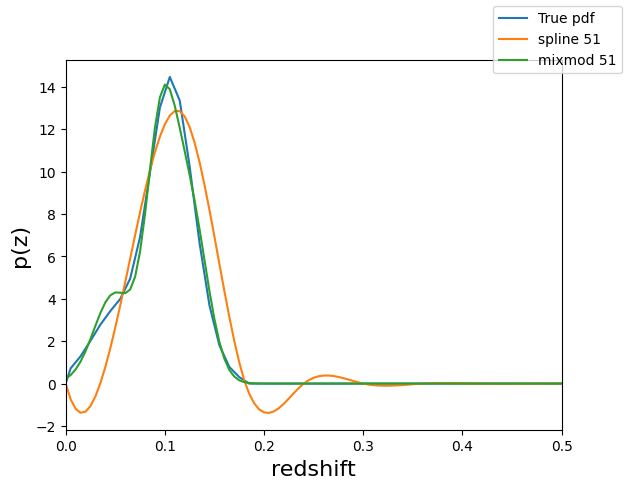

In [24]:
ens_s51 = qp.convert(ens_red, 'spline', xvals=np.linspace(0, 3.0, 51), method="xy")
ens_m51 = qp.convert(ens_red, 'mixmod', xvals = np.linspace(0, 3.0, 51))
key = 0
axes_s = ens_red.plot(key, xlim=(0, 0.5), label="True pdf")
_ = ens_s51.plot(key, axes=axes_s, label="spline 51")
_ = ens_m51.plot(key, axes=axes_s, label="mixmod 51")
leg_s = axes_s.figure.legend()

From this graph above we can see that the mixmod model evaluated at 51 sample points is closer to the true pdf compared to the spline model even though they are both pretty accurate approximations as compared to the other models plotted in the graph above the previous one.

Now let's add the mixmod to the graph with the interpolated graphs as well with 51 sample points and 3 components. I have added this to the model above. The mixmod model is still the closest approximation to the true pdf.

Now, let's compare those KLDS, true approx to mixmod

In [25]:
symm_lims = np.array([-1., 1.])
all_lims = [symm_lims, 2.*symm_lims, 3.*symm_lims]

In [26]:
klds1 = qp.metrics.calculate_kld(ens_red, ens_m51, limits=symm_lims)
print(klds1)

Negative Values in pn(array([ 0,  0,  0, ..., 99, 99, 99]), array([  0,   1,   2, ..., 197, 198, 199]))
Negative Values in qn(array([ 0,  0,  0, ..., 99, 99, 99]), array([  0,   1,   2, ..., 197, 198, 199]))
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
[7.63242716e-05 6.25460968e-04 6.24888071e-05 6.95487851e-05
 6.82044128e-05 1.76894885e-04 1.64619307e-04 2.36094338e-04
 8.28890019e-05 6.09192588e-05 1.19664709e-04 1.03987466e-

the KLD is a measure of the loss of information between the first parameter (ens_red) which is the probability distribution closer to the truth and the second paraemeter (mixmod) which is an approximation of the first parameter. Smaller values are better. We can see that the values are pretty small meaning that the number of bits needed to convert mixmod to ens_red is not that many

In [27]:
klds2 = qp.metrics.calculate_kld(ens_red, ens_s21, limits=symm_lims)
klds2 = klds2[~np.isnan(klds2)]
print(klds2)

Negative Values in pn(array([ 0,  0,  0, ..., 99, 99, 99]), array([  0,   1,   2, ..., 197, 198, 199]))
Negative Values in qn(array([ 0,  0,  0, ..., 99, 99, 99]), array([100, 101, 102, ..., 187, 188, 189]))
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. nan nan  1.
  1.  1.  1.  1. nan  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1. nan  1.  1. nan  1.  1.  1. nan nan nan  1.  1.
  1.  1.  1. nan  1.  1. nan  1.  1. nan  1.  1. nan nan  1.  1. nan  1.
  1.  1.  1.  1.  1. nan  1.  1.  1.  1.  1. nan  1.  1. nan nan  1. nan
 nan nan nan nan nan  1. nan  1.  1.  1.]
[0.33665256 0.33591137 0.33879223 0.33639854 0.33977767 0.33795369
 0.3396974  

We can see that the loss of information between the true approximation and spline model is much greater than that of the mixmod

In [28]:
klds3 = qp.metrics.calculate_kld(ens_red, ens_h51, limits=symm_lims)
klds3 = klds3[~np.isnan(klds3)]
print(klds3)

Negative Values in pn(array([ 0,  0,  0, ..., 99, 99, 99]), array([  0,   1,   2, ..., 197, 198, 199]))
Negative Values in qn(array([ 0,  0,  0, ..., 99, 99, 99]), array([  0,   1,   2, ..., 197, 198, 199]))
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
[0.0015375  0.0022213  0.00190754 0.00232262 0.00178422 0.00129208
 0.00204545 0.00068782 0.00147891 0.00156985 0.00288911 0.00167316
 0.00105614 0.0014933  0.00143947 0.00315948 0

By looking at one of the figures above we estimate that the histogram KLD values wil be greater than those of the mixmod, which is true by the above array.

Now we will iterate through the approximations ens_h, ens_m, and ens_q calculating the KLD from the 100 truths to the 100 approximations. The below code shows how the KLD changes as the limits of integration from -1 to 1, -2 to 2, -3 to 3. 

In [29]:
# Loop over all the other ensemble types
ensembles = [ens_h51, ens_s51, ens_q51, ens_m51]
for ensemble in ensembles[1:]:
    D = []
    for lims in all_lims:
        klds = qp.metrics.calculate_kld(ens_red, ensemble, limits=lims)
        D.append("%.2e +- %.2e" % (klds.mean(), klds.std()))
    print(ensemble.gen_class.name + ' approximation: KLD over 1, 2, 3, sigma ranges = ' + str(D))

Negative Values in pn(array([ 0,  0,  0, ..., 99, 99, 99]), array([  0,   1,   2, ..., 197, 198, 199]))
Negative Values in qn(array([ 0,  0,  0, ..., 99, 99, 99]), array([100, 101, 102, ..., 193, 194, 195]))
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
Negative Values in pn(array([ 0,  0,  0, ..., 99, 99, 99]), array([  0,   1,   2, ..., 397, 398, 399]))
Negative Values in qn(array([ 0,  0,  0, ..., 99, 99, 99]), array([200, 201,

/opt/miniconda3/lib/python3.12/site-packages/qp/quantile_pdf_constructors/piecewise_linear.py:37: RuntimeWarning: divide by zero encountered in divide
  self._cdf_derivatives = (self._quantiles[1:] - self._quantiles[0:-1])/\
/opt/miniconda3/lib/python3.12/site-packages/qp/quant_pdf.py:219: RuntimeWarning: invalid value encountered in divide
  return tmp/sum(tmp)/(max(x)-min(x))
/opt/miniconda3/lib/python3.12/site-packages/qp/metrics/metrics.py:123: RuntimeWarning: invalid value encountered in divide
  qn = (qn.T/qn.sum(1)).T


Our results are as follows:
hist approximation: KLD over 1, 2, 3, sigma ranges = ['1.93e-01 +- 6.70e-02', '1.95e-01 +- 6.71e-02', '1.96e-01 +- 6.71e-02']
spline approximation: KLD over 1, 2, 3, sigma ranges = ['2.22e-16 +- 0.00e+00', '2.22e-16 +- 0.00e+00', '2.22e-16 +- 0.00e+00']
quant approximation: KLD over 1, 2, 3, sigma ranges = ['2.22e-16 +- 0.00e+00', '2.22e-16 +- 0.00e+00', '2.22e-16 +- 0.00e+00']
mixmod approximation: KLD over 1, 2, 3, sigma ranges = ['3.16e-02 +- 3.83e-02', '3.16e-02 +- 3.82e-02', '3.17e-02 +- 3.82e-02']

When using the histogram form, the average KLD changes from .193 to .195 to .196. When using the spline approximation, the average KLD remains 2.22e^-16. The quant approximation yields the same thing. When using the mixmod approximation, the average KLD changes from .0316 to .0316 to .0317. The values after the +- are standard deviations over the 100 different case. Over these approximations, we see that the histogram approximation and mixmod reflects failure of the approximation in the tails of the distribution because of the increase in values. However, it seems that regarding the tails of the spline and quant model, there is not a significant failure of approximation in the tails. We conclude that the histogram loses the most bits followed by spline, then quant, then mix mod. 

Now let's look at the RMSE for the above comparisions. Unlike the KLD, the RMSE is symmetric. The RMSE measures the average difference between values predicted by a model and the actual values. It provides and estimation of how well the model is able to predict the target value (accuracy).

In [30]:
rmse1 = qp.metrics.calculate_rmse(ens_red, ens_m51, limits=symm_lims)
print(rmse1)

[0.15836464 0.55688736 0.15330605 0.16541956 0.20606218 0.1684674
 0.18767205 0.27080937 0.23698901 0.1195959  0.23696873 0.20905969
 0.14268278 0.12900045 0.17158887 0.12287135 0.25556567 0.50743335
 0.13626269 0.16840804 0.19704096 0.16632812 0.15104089 0.09838598
 0.2154626  0.24619596 0.10225881 0.18951931 0.37575578 0.22190266
 0.20148826 0.20841355 0.26796272 0.51692586 0.42514536 0.2201328
 0.36718947 0.32558844 0.22960355 0.19312001 0.15142407 0.20891239
 0.21752353 0.26670763 0.18869788 0.76420246 0.16772398 0.16358755
 0.20858258 0.22775641 0.18197728 0.53236841 0.59900879 0.19908596
 0.19548051 0.19535133 0.13663925 0.16413945 0.15004471 0.18090303
 0.23359962 0.2025871  0.46508946 0.20558641 0.20478031 0.49669342
 0.24808327 0.30430836 0.12927823 0.18861453 0.22288325 0.19366525
 0.37230195 0.53286364 0.17684337 0.15301026 0.2763775  0.48391692
 0.1756361  0.16406943 0.23856496 0.196      0.16465128 0.26891549
 0.18552897 0.22599269 0.1837554  0.75170666 0.1869777  0.264548

We see small average error between the approximated values and the actual values

In [31]:
rmse2 = qp.metrics.calculate_rmse(ens_red, ens_s21, limits=symm_lims)
rmse2 = rmse2[~np.isnan(rmse2)]
print(rmse2)

[559.31633256 559.3171091  559.31728894 559.3163944  559.31764095
 559.31729405 559.31754985 559.31661892 559.31645781 559.31675486
 559.31855655 559.31747064 527.88278176 559.31631495 559.31557714
 559.31910515 559.3171103  559.31594822 559.31556707 559.31669513
 559.31557383 559.31561647 559.31770011 559.31651534 559.31564593
 559.31905285 559.31805641 559.31740396 559.3171919  559.31789642
 559.32056714 559.31795354 559.31772326 559.31718014 559.31657718
 559.31874075 559.31819307 559.31631325 559.31760238 559.31776151
 559.3164938  559.31695998  58.65114132 559.31578798 559.320633
 559.31575382 559.3186179  559.31761052 559.31652025 559.31729761
 559.31705149 559.31746557 559.3168108  559.31780515 559.32041045
 559.31547781 559.3177429  559.3176641  559.31714248 559.31672124
 559.31754341 559.31713125 559.31633098 559.3174373  559.31803699
 559.31757547 559.31756983 559.3177528  559.31780741 559.31682146
 559.31641568 559.31695584 559.31754138 559.31737987 559.31648865]


These values are very large

In [32]:
rmse3 = qp.metrics.calculate_rmse(ens_red, ens_h51, limits=symm_lims)
rmse3 = rmse3[~np.isnan(rmse3)]
print(rmse3)

[0.87165477 1.00569591 0.89614424 1.2081006  0.80615204 0.94334062
 1.06758225 0.55742046 0.63289013 0.71921106 1.39437424 0.93565212
 0.58400255 0.95258344 0.6142     1.51020223 0.98608253 0.73501065
 1.22155208 0.80673268 0.8061497  0.78998703 1.5183269  0.52495166
 0.7420222  1.52556812 0.91503582 0.64918302 0.75263163 0.87494121
 0.82126013 1.00704593 1.0301836  0.64834806 0.51884012 0.98567209
 0.97633669 0.4296007  1.50952735 0.79299386 0.61859527 1.31888093
 1.21921028 0.73950388 0.70356954 1.10393392 0.73124102 0.43980534
 0.68249467 1.45824596 1.47101233 0.74500397 0.66490909 0.51021343
 1.43415764 0.70944183 0.93613266 1.31015941 1.16815706 0.7811375
 1.53190676 0.74974911 0.93146899 1.49927968 1.53034132 0.75293939
 1.28770794 0.88927683 0.56898924 1.16366351 1.53763447 1.01169856
 1.18284909 0.8768503  0.81015437 0.85352325 1.13717581 0.74688517
 1.16106448 1.19111416 0.7641378  1.16540274 0.85640336 1.04697934
 1.10914977 0.79618044 1.29290913 1.27727155 0.67385695 0.90468

Values are larger than mixmod but not by much

In [33]:
rmse4 = qp.metrics.calculate_rmse(ens_red, ens_q51, limits=symm_lims)
rmse4 = rmse4[~np.isnan(rmse4)]
rmse4 = rmse4[~np.isinf(rmse4)]
print(rmse4)

[2.15583387 2.37544639 2.16614168 2.47793006 2.2811289  2.50207031
 1.98176531 2.19329782 2.22180926 2.52948265 2.32757348 1.85283749
 2.13344368 1.85913319 2.54007144 2.49256267 2.39704543 2.07048715
 1.85282932 2.28784272 2.54519233 1.94756595 1.84430486 2.54614675
 2.22861391 1.90473122 2.55993125 2.40149997 2.28019389 2.50752961
 2.4604244  2.53263302 2.54592658 2.07008465 2.52508037 2.53418825
 2.52945999 2.21339162 2.29109881 1.38679226 1.94141879 2.57549657
 2.51520335 1.8465805  2.53622921 2.40893031 2.24988164 2.41080418
 2.44279547 2.29691535 2.54837215 2.42654587 2.5469311  2.55955174
 2.40730832 1.91520019 2.51837513 2.56828815 2.53129441 2.44667327
 2.27113982 2.05998787 2.37833746 2.34901632 2.46631397 2.36602349
 2.54345651 2.53872337 2.52238695 2.20778828 2.5342124  2.19453397
 2.48941505 2.48038616 2.62801886 2.4968888  2.03297864 2.56100649
 2.49800623 2.36916156 1.89901685]


In [34]:
klds5 = qp.metrics.calculate_kld(ens_red, ens_s51, limits=symm_lims)
klds5 = klds5[~np.isnan(klds5)]
print(klds5)

Negative Values in pn(array([ 0,  0,  0, ..., 99, 99, 99]), array([  0,   1,   2, ..., 197, 198, 199]))
Negative Values in qn(array([ 0,  0,  0, ..., 99, 99, 99]), array([100, 101, 102, ..., 193, 194, 195]))
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
[0.10261526 0.17467136 0.33879223 0.12007268 0.33977767 0.33758256
 0.10022512 0.33518112 0.07578129 0.09855041 0.34017735 0.33809798
 0.09720208 0.11320624 0.33405827 0.33959623 0

In [35]:
klds4 = qp.metrics.calculate_kld(ens_red, ens_q51, limits=symm_lims)
klds4 = klds4[~np.isnan(klds4)]
klds4 = klds4[klds4 != -np.inf]
print(klds4)

Negative Values in pn(array([ 0,  0,  0, ..., 99, 99, 99]), array([  0,   1,   2, ..., 197, 198, 199]))
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
[]


More accurate than histogram, arguably more accurate than mixmod. These numerical values support the graphs above

/opt/miniconda3/lib/python3.12/site-packages/numpy/lib/_histograms_impl.py:895: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


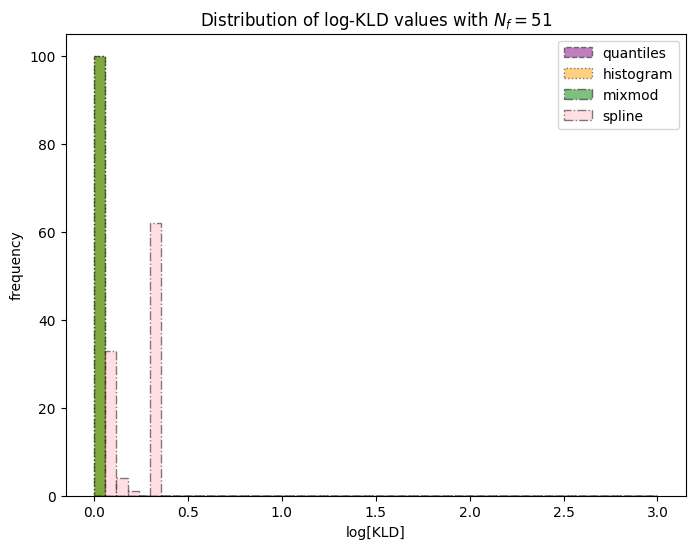

In [36]:

# Assuming you have your data in numpy arrays
# Example data (replace with your actual data)
log_kld_quantiles = klds4  # replace with actual quantiles data
log_kld_histogram = klds3  # replace with actual histogram data
log_kld_mixmod = klds1
log_kld_spline = klds5


# Create histogram data for plotting
bins = np.linspace(0, 3.0, 51)
hist_quantiles, bins = np.histogram(log_kld_quantiles, bins=bins, density=True)
hist_histogram, _ = np.histogram(log_kld_histogram, bins=bins, density=True)
hist_mixmod, _ = np.histogram(log_kld_mixmod, bins=bins, density=True)
hist_spline, _ = np.histogram(log_kld_spline, bins=bins, density=True)

# Plotting
plt.figure(figsize=(8, 6))

# Plot the histograms with the specified styles
plt.hist(log_kld_quantiles, bins=bins, alpha=0.5, label='quantiles', color='purple', edgecolor='black', linestyle='--')
plt.hist(log_kld_histogram, bins=bins, alpha=0.5, label='histogram', color='orange', edgecolor='black', linestyle=':')
plt.hist(log_kld_mixmod, bins=bins, alpha=0.5, label='mixmod', color='green', edgecolor='black', linestyle='-.')
plt.hist(log_kld_spline, bins=bins, alpha=0.5, label='spline', color='pink', edgecolor='black', linestyle='-.')

# Labels and title
plt.xlabel('log[KLD]')
plt.ylabel('frequency')
plt.title(r'Distribution of log-KLD values with $N_f = 51$')
plt.legend()

# Show plot
plt.show()

/opt/miniconda3/lib/python3.12/site-packages/qp/spline_pdf.py:50: RuntimeWarning: invalid value encountered in divide
  return (yvals.T / integrals).T


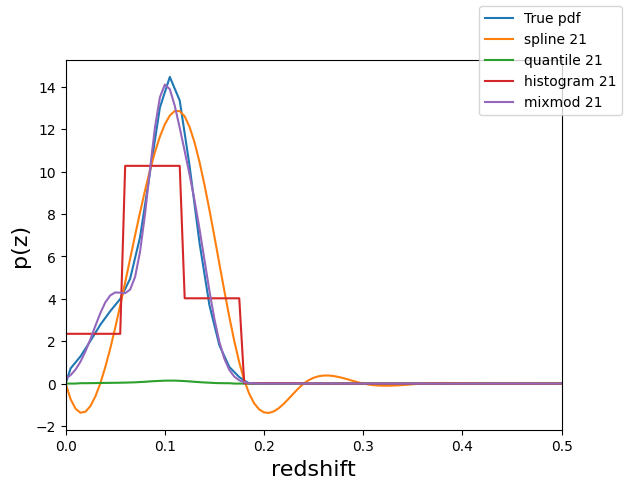

In [37]:
ens_h21 = qp.convert(ens_red, 'hist', bins = np.linspace(0, 3.0, 21))
ens_s21 = qp.convert(ens_red, 'spline', xvals=np.linspace(0, 3.0, 21), method="xy")
ens_q21 = qp.convert(ens_red, 'quant', quants=np.linspace(0.01, 0.99, 21))
ens_m21 = qp.convert(ens_red, 'mixmod', xvals = np.linspace(0, 3.0, 21))
key = 0
axes_s = ens_red.plot(key, xlim=(0, 0.5), label="True pdf")
_ = ens_s51.plot(key, axes=axes_s, label="spline 21")
_ = ens_q51.plot(key, axes=axes_s, label="quantile 21")
_ = ens_h51.plot(key, axes=axes_s, label="histogram 21")
_ = ens_m51.plot(key, axes=axes_s, label="mixmod 21")
leg_s = axes_s.figure.legend()

In [38]:
kldsq = qp.metrics.calculate_kld(ens_red, ens_q21, limits=symm_lims)
kldsq = kldsq[~np.isnan(kldsq)]
kldsq = kldsq[~np.isinf(kldsq)]
kldss = qp.metrics.calculate_kld(ens_red, ens_s21, limits=symm_lims)
kldss = kldss[~np.isnan(kldss)]
kldss = kldss[~np.isinf(kldss)]
kldsm = qp.metrics.calculate_kld(ens_red, ens_m21, limits=symm_lims)
kldsm = kldsm[~np.isnan(kldsm)]
kldsm = kldsm[~np.isinf(kldsm)]
kldsh = qp.metrics.calculate_kld(ens_red, ens_h21, limits=symm_lims)
kldsh = kldsh[~np.isnan(kldsh)]
kldsh = kldsh[~np.isinf(kldsh)]

/opt/miniconda3/lib/python3.12/site-packages/qp/quantile_pdf_constructors/piecewise_linear.py:37: RuntimeWarning: divide by zero encountered in divide
  self._cdf_derivatives = (self._quantiles[1:] - self._quantiles[0:-1])/\
/opt/miniconda3/lib/python3.12/site-packages/qp/quant_pdf.py:219: RuntimeWarning: invalid value encountered in divide
  return tmp/sum(tmp)/(max(x)-min(x))
/opt/miniconda3/lib/python3.12/site-packages/qp/metrics/metrics.py:123: RuntimeWarning: invalid value encountered in divide
  qn = (qn.T/qn.sum(1)).T


Negative Values in pn(array([ 0,  0,  0, ..., 99, 99, 99]), array([  0,   1,   2, ..., 197, 198, 199]))
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
Negative Values in pn(array([ 0,  0,  0, ..., 99, 99, 99]), array([  0,   1,   2, ..., 197, 198, 199]))
Negative Values in qn(array([ 0,  0,  0, ..., 99, 99, 99]), array([100, 101, 10

/opt/miniconda3/lib/python3.12/site-packages/numpy/lib/_histograms_impl.py:895: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


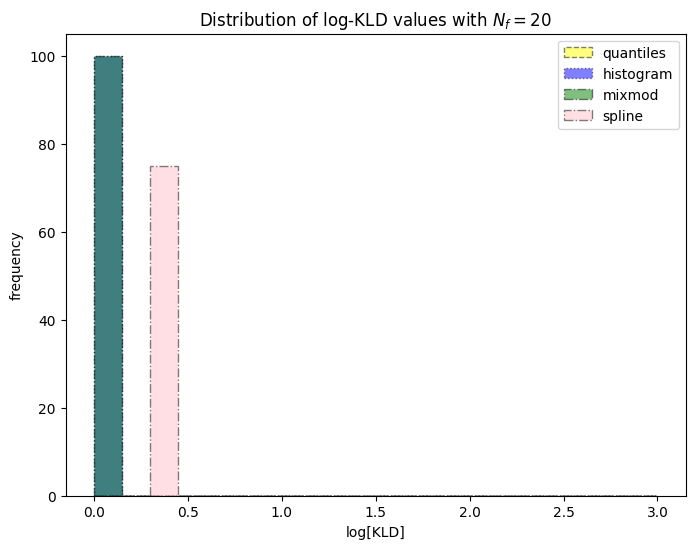

In [39]:
log_kld_quantiles = kldsq 
log_kld_histogram = kldsh  
log_kld_mixmod = kldsm
log_kld_spline = kldss


# Create histogram data for plotting
bins = np.linspace(0, 3.0, 21)
hist_quantiles, bins = np.histogram(log_kld_quantiles, bins=bins, density=True)
hist_histogram, _ = np.histogram(log_kld_histogram, bins=bins, density=True)
hist_mixmod, _ = np.histogram(log_kld_mixmod, bins=bins, density=True)
hist_spline, _ = np.histogram(log_kld_spline, bins=bins, density=True)

# Plotting
plt.figure(figsize=(8, 6))

# Plot the histograms with the specified styles
plt.hist(log_kld_quantiles, bins=bins, alpha=0.5, label='quantiles', color='yellow', edgecolor='black', linestyle='--')
plt.hist(log_kld_histogram, bins=bins, alpha=0.5, label='histogram', color='blue', edgecolor='black', linestyle=':')
plt.hist(log_kld_mixmod, bins=bins, alpha=0.5, label='mixmod', color='green', edgecolor='black', linestyle='-.')
plt.hist(log_kld_spline, bins=bins, alpha=0.5, label='spline', color='pink', edgecolor='black', linestyle='-.')

# Labels and title
plt.xlabel('log[KLD]')
plt.ylabel('frequency')
plt.title(r'Distribution of log-KLD values with $N_f = 20$')
plt.legend()

# Show plot
plt.show()

From the above graph, we can see that the mixmod and quantile has a lower median KLD than histogram. Then the histogram has a lower median KLD than spline.

Since our goal is to compress these pdfs meaning lowering KLD and using the fewest number of parameters, we willl use 5 parameters instead of 21/51 like we have been

In [127]:
ens_h6 = qp.convert(ens, 'hist', bins = np.linspace(0, 3.0, 6))
ens_s6 = qp.convert(ens, 'spline', xvals=np.linspace(0, 3.0, 6), method="xy")
ens_q6 = qp.convert(ens, 'quant', quants=np.linspace(0.01, 0.99, 6))
ens_m6 = qp.convert(ens_red, 'mixmod', xvals = np.linspace(0, 3.0, 6))
ens_i6 = qp.convert(ens, 'interp', xvals = np.linspace(0, 3.0, 6))

In [167]:
bins = np.linspace(0, 3.0, 6)
quants=np.linspace(0.01, 0.99, 6)
print("Making hist")
ens_h = ens.convert_to(qp.hist_gen, bins=bins)
print("Making interp")
ens_i = ens_red.convert_to(qp.interp_gen, xvals=bins)
print("Making spline")
ens_s = ens_red.convert_to(qp.spline_gen, xvals=bins, method="xy")
print("Making quants")
ens_q = ens_red.convert_to(qp.quant_gen, quants=quants)
print("Making mixmod")
ens_m = ens_red.convert_to(qp.mixmod_gen, samples=6, ncomps=3)

Making hist
Making interp
Making spline
Making quants
Making mixmod


/opt/miniconda3/lib/python3.12/site-packages/qp/interp_pdf.py:88: RuntimeWarning: invalid value encountered in divide
  self._yvals = (self._yvals.T / self._ycumul[:, -1]).T
/opt/miniconda3/lib/python3.12/site-packages/qp/interp_pdf.py:89: RuntimeWarning: invalid value encountered in divide
  self._ycumul = (self._ycumul.T / self._ycumul[:, -1]).T
/opt/miniconda3/lib/python3.12/site-packages/qp/spline_pdf.py:50: RuntimeWarning: invalid value encountered in divide
  return (yvals.T / integrals).T


IndexError: index 15 is out of bounds for axis 0 with size 2

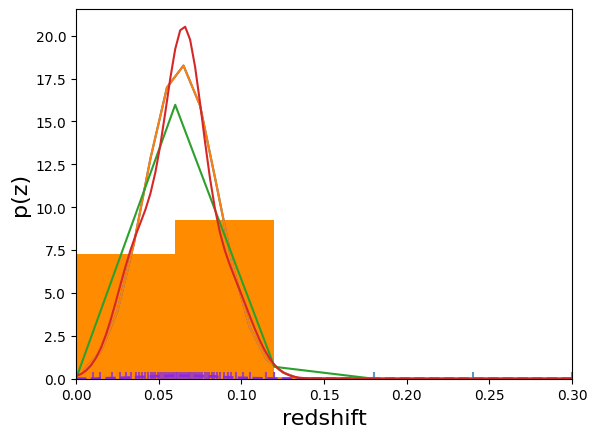

In [166]:
fig, axes = qp.plotting.plot_native(ens_red[15], xlim=(0,0.3))
qp.plotting.plot_native(ens_red[15], axes=axes, label='True PDF')
qp.plotting.plot_native(ens_h[15], axes=axes)
qp.plotting.plot_native(ens_q[15], axes=axes, label='quantile')
qp.plotting.plot_native(ens_i[15], axes=axes, label='interp')
qp.plotting.plot_native(ens_m[15], axes=axes, label='mixmod')
qp.plotting.plot_native(ens_s[15], axes=axes, label='spline')
leg = fig.legend()

In [41]:
symm_lims = np.array([-1., 1.])
all_lims = [symm_lims, 2.*symm_lims, 3.*symm_lims]

In [42]:
kldsMixMod = qp.metrics.calculate_kld(ens_red, ens_m6, limits=symm_lims)
print(kldsMixMod)

NameError: name 'ens_m6' is not defined

In [83]:
kldsSpline = qp.metrics.calculate_kld(ens, ens_s6, limits=symm_lims)
print(kldsSpline)

Negative Values in pn(array([ 0,  0,  0, ..., 99, 99, 99]), array([  0,   1,   2, ..., 197, 198, 199]))
Negative Values in qn(array([ 0,  0,  0, ..., 99, 99, 99]), array([160, 161, 162, ..., 197, 198, 199]))
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
[0.03812417 0.03713776 0.03979764 0.03882714 0.04067275 0.03866754
 0.04114174 0.03579196 0.03865554 0.04024394 0.04448401 0.0421177
 0.05293992 0.03837176 0.03638841 0.04032437 0.

In [84]:
kldsQuantile = qp.metrics.calculate_kld(ens, ens_q6, limits=symm_lims)
print(kldsQuantile)

Negative Values in pn(array([ 0,  0,  0, ..., 99, 99, 99]), array([  0,   1,   2, ..., 197, 198, 199]))
Negative Values in qn(array([ 0,  0,  0, ..., 99, 99, 99]), array([  0,   1,   2, ..., 197, 198, 199]))
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
[0.00511631 0.00755774 0.00491445 0.00445436 0.00380516 0.00681518
 0.00582045 0.00549512 0.00671649 0.00579582 0.00597995 0.00539074
 0.01151879 0.00568646 0.00354453 0.00552935 0

In [30]:
kldsHistogram = qp.metrics.calculate_kld(ens, ens_h6, limits=symm_lims)
print(kldsHistogram)

/opt/miniconda3/lib/python3.12/site-packages/qp/metrics/metrics.py:122: RuntimeWarning: invalid value encountered in divide
  pn = (pn.T/pn.sum(1)).T
/opt/miniconda3/lib/python3.12/site-packages/qp/metrics/metrics.py:123: RuntimeWarning: invalid value encountered in divide
  qn = (qn.T/qn.sum(1)).T


Negative Values in pn(array([    0,     0,     0, ..., 19999, 19999, 19999]), array([  0,   1,   2, ...,  98,  99, 100]))
Negative Values in qn(array([    0,     0,     0, ..., 19999, 19999, 19999]), array([ 0,  1,  2, ..., 97, 98, 99]))
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
[0.01555398 0.01481279 0.01769365 ... 0.01381066 0.00453073 0.00184386]


In [85]:
kldsInterp = qp.metrics.calculate_kld(ens, ens_i6, limits=symm_lims)
print(kldsInterp)

Negative Values in pn(array([ 0,  0,  0, ..., 99, 99, 99]), array([  0,   1,   2, ..., 197, 198, 199]))
Negative Values in qn(array([ 0,  0,  0, ..., 99, 99, 99]), array([  0,   1,   2, ..., 197, 198, 199]))
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
[0.01068936 0.01439154 0.01211496 0.01146154 0.01293478 0.01235995
 0.01317039 0.01082781 0.01079804 0.01178897 0.01524878 0.01306907
 0.01988542 0.01092215 0.0080858  0.01312673 0

In [91]:
# Loop over all the other ensemble types
ensembles = [ens_h, ens_s6, ens_q6, ens_m6]
for ensemble in ensembles[1:]:
    D = []
    for lims in all_lims:
        klds = qp.metrics.calculate_kld(ens, ensemble, limits=lims)
        D.append("%.2e +- %.2e" % (klds.mean(), klds.std()))
    print(ensemble.gen_class.name + ' approximation: KLD over 1, 2, 3, sigma ranges = ' + str(D))

Negative Values in pn(array([ 0,  0,  0, ..., 99, 99, 99]), array([  0,   1,   2, ..., 197, 198, 199]))
Negative Values in qn(array([ 0,  0,  0, ..., 99, 99, 99]), array([160, 161, 162, ..., 197, 198, 199]))
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
Negative Values in pn(array([ 0,  0,  0, ..., 99, 99, 99]), array([  0,   1,   2, ..., 397, 398, 399]))
Negative Values in qn(array([ 0,  0,  0, ..., 99, 99, 99]), array([260, 261,

In [88]:
for ensemble in ensembles[1:]:
    D = []
    for lims in all_lims:
        rmses = qp.metrics.calculate_rmse(ens, ensemble, limits=lims)
        D.append("%.2e +- %.2e" % (rmses.mean(), rmses.std()))
    print(ensemble.gen_class.name + ' approximation: RMSE over 1, 2, 3, sigma ranges = ' + str(D))

spline approximation: RMSE over 1, 2, 3, sigma ranges = ['1.54e+01 +- 8.04e-01', '4.46e+01 +- 1.68e+00', '9.88e+01 +- 3.06e+00']
quant approximation: RMSE over 1, 2, 3, sigma ranges = ['2.31e+00 +- 2.61e-01', '1.63e+00 +- 1.85e-01', '1.33e+00 +- 1.51e-01']
mixmod approximation: RMSE over 1, 2, 3, sigma ranges = ['2.17e-01 +- 2.69e-01', '1.54e-01 +- 1.90e-01', '1.25e-01 +- 1.55e-01']


In [93]:
ensemble = ens_h6
D = []
for lims in all_lims:
    rmses = qp.metrics.calculate_rmse(ens, ensemble, limits=lims)
    D.append("%.2e +- %.2e" % (rmses.mean(), rmses.std()))
print(ensemble.gen_class.name + ' approximation: RMSE over 1, 2, 3, sigma ranges = ' + str(D))

hist approximation: RMSE over 1, 2, 3, sigma ranges = ['2.12e+00 +- 2.81e-01', '1.50e+00 +- 1.99e-01', '1.23e+00 +- 1.63e-01']


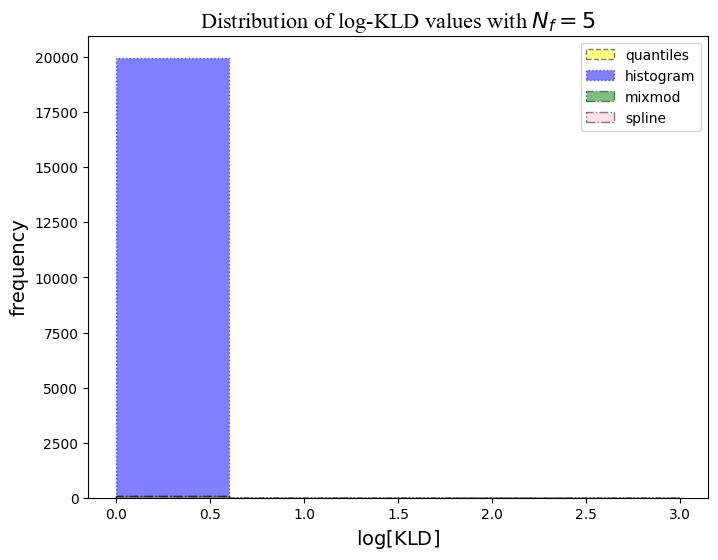

In [94]:
log_kld_quantiles = kldsQuantile
log_kld_histogram = kldsHistogram 
log_kld_mixmod = kldsMixMod
log_kld_spline = kldsSpline


# Create histogram data for plotting
bins = np.linspace(0, 3.0, 6)
hist_quantiles, bins = np.histogram(log_kld_quantiles, bins=bins, density=True)
hist_histogram, _ = np.histogram(log_kld_histogram, bins=bins, density=True)
hist_mixmod, _ = np.histogram(log_kld_mixmod, bins=bins, density=True)
hist_spline, _ = np.histogram(log_kld_spline, bins=bins, density=True)

# Plotting
plt.figure(figsize=(8, 6))

# Plot the histograms with the specified styles
plt.hist(log_kld_quantiles, bins=bins, alpha=0.5, label='quantiles', color='yellow', edgecolor='black', linestyle='--')
plt.hist(log_kld_histogram, bins=bins, alpha=0.5, label='histogram', color='blue', edgecolor='black', linestyle=':')
plt.hist(log_kld_mixmod, bins=bins, alpha=0.5, label='mixmod', color='green', edgecolor='black', linestyle='-.')
plt.hist(log_kld_spline, bins=bins, alpha=0.5, label='spline', color='pink', edgecolor='black', linestyle='-.')

# Labels and title
plt.xlabel(r'$\log[\mathrm{KLD}]$', fontsize = 14, fontname = 'Times New Roman')
plt.ylabel('frequency', fontsize = 14)
plt.title(r'Distribution of log-KLD values with $N_f = 5$', fontsize = 16, fontname = 'Times New Roman')
plt.legend()

# Show plot
plt.show()

From the KLDS, we see that the least amount of information lost is between the true pdf and mixmod, then true pdf and quantile, followed by true pdf and interp, followed by true pdf and histogram. The most amount of bits lost is between the true pdf and spline evaluated at 5 parameters. When looking at the 100 truths vs 100 approximations, the average KLD for the histogram format is about 1.7 over 1, 2, 3, sigma ranges. The quantile model changes from 0.451 to 0.438 to 0.427 meaning it does not reflect a failure to approximate the tails. The mixmod model changes from .0314 to .0315 to .0315 which is probably the best model so far. The RMSE also reflects these trends. Compared to the models with 20 or 50 parameters, these values are larger for both KLD and RMSE, meaning that the more parameters there are the more "accurate" the models get. Looking at the distribution of log-KLD values, the mixmod has the lowest median KLD, followed by quantiles, then histogram, and then spline as reflected by our calculations above.

Now, I'll try to calculate the first 3 moments (mean, variance, and skewness) of the different ensembles (quantiles, hisotgram, spline, mixmod)

In [95]:
ensembles = [ens_red, ens_h6, ens_s6, ens_q6, ens_m6]
which_moments = range(3)
all_moments = []
for ens in ensembles:
    moments = []
    for n in which_moments:
        moms = qp.metrics.calculate_moment(ens, n, limits=(-3, 3))
        moments.append("%.2e +- %.2e" % (moms.mean(), moms.std()))
    all_moments.append(moments)
    
print('moments: '+str(which_moments))
for ens, mom in zip(ensembles, all_moments):
    print(ens.gen_class.name+': '+str(mom))

moments: range(0, 3)
interp: ['1.01e+00 +- 2.33e-02', '9.21e-02 +- 4.55e-02', '1.24e-02 +- 2.18e-02']
hist: ['1.00e+00 +- 2.13e-16', '3.03e-01 +- 2.02e-02', '1.23e-01 +- 2.43e-02']
spline: ['3.17e+02 +- 5.31e+01', '-6.98e+02 +- 1.19e+02', '1.67e+03 +- 2.86e+02']
quant: ['1.67e-05 +- 2.39e-06', '1.61e-06 +- 1.25e-06', '2.40e-07 +- 5.65e-07']
mixmod: ['1.00e+00 +- 3.06e-02', '9.21e-02 +- 4.54e-02', '1.25e-02 +- 2.15e-02']


For interpolated: 1.01 is the mean value with uncertainty .0233, .0921 is the variance value with uncertainty .0455, .0124 is the skewness value with uncertainty .0218

For histogram: 1.00 is mean value with uncertainty .000476, .593 is the variance value with uncertainty .367, .657 is the skewness value with uncertainty .747

For quantile: 1.14 is mean value with uncertainty .157, .109 is the variance value with uncertainty .0828, .0162 is the skewness value with uncertainty .0379

For mixmod: 1.00 is mean value with uncertainty 1.25*10^-6, .0922 is the variance value with uncertainty .0446, .0124 is the skewness value with uncertainty .0208

Calculating the mean, variance, and skewness at 3, 10, 30, and 100 parameters for histogram, quantile, mixmod, and spline.

In [44]:
ens_h3 = qp.convert(ens_red, 'hist', bins = np.linspace(0, 3.0, 4))
ens_q3 = qp.convert(ens, 'quant', quants=np.linspace(0.01, 0.99, 4))
ens_m3 = qp.convert(ens_red, 'mixmod', xvals = np.linspace(0, 3.0,4))

In [45]:
ens_h10 = qp.convert(ens_red, 'hist', bins = np.linspace(0, 3.0, 11))
ens_m10 = qp.convert(ens_red, 'mixmod', xvals = np.linspace(0, 3.0,11))

In [46]:
ens_h30 = qp.convert(ens_red, 'hist', bins = np.linspace(0, 3.0, 31))
ens_m30 = qp.convert(ens_red, 'mixmod', xvals = np.linspace(0, 3.0,31))

In [140]:
ens_h100 = qp.convert(ens_red, 'hist', bins = np.linspace(0, 3.0, 101))
ens_m100 = qp.convert(ens_red, 'mixmod', xvals = np.linspace(0, 3.0,101))

**restarted new code from here**

In [47]:
ens_s3 = qp.convert(ens, 'spline', xvals=np.linspace(0, 3.0, 4), method="xy")

/opt/miniconda3/lib/python3.12/site-packages/qp/spline_pdf.py:50: RuntimeWarning: invalid value encountered in divide
  return (yvals.T / integrals).T


In [134]:
ens_s10 = qp.convert(ens, 'spline', xvals=np.linspace(0, 3.0, 10), method="xy")

In [135]:
ens_s30 = qp.convert(ens, 'spline', xvals=np.linspace(0, 3.0, 31), method="xy")

In [136]:
ens_s100 = qp.convert(ens_red, 'spline', xvals=np.linspace(0, 3.0, 101), method="xy")

/opt/miniconda3/lib/python3.12/site-packages/qp/spline_pdf.py:45: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(spl, limits[0], limits[1], **kwargs)[0]


In [137]:
ens_q10 = qp.convert(ens, 'quant', quants=np.linspace(0.01, 0.99, 11))

In [138]:
ens_q30 = qp.convert(ens, 'quant', quants=np.linspace(0.01, 0.99, 31))

In [139]:
ens_q100 = qp.convert(ens, 'quant', quants=np.linspace(0.01, 0.99, 101))

In [77]:
ensembles = [ens_h3, ens_s3, ens_q3, ens_m3]
which_moments = range(3)
all_moments = []
for ens in ensembles:
    moments = []
    for n in which_moments:
        moms = qp.metrics.calculate_moment(ens, n, limits=(-3, 3))
        moments.append("%.2e +- %.2e" % (moms.mean(), moms.std()))
    all_moments.append(moments)
    
print('moments: '+str(which_moments))
for ens, mom in zip(ensembles, all_moments):
    print(ens.gen_class.name+': '+str(mom))

moments: range(0, 3)
hist: ['1.00e+00 +- 2.22e-16', '5.02e-01 +- 1.11e-16', '3.35e-01 +- 5.44e-17']
spline: ['6.43e+01 +- 2.07e-14', '-1.32e+02 +- 4.69e-14', '3.10e+02 +- 1.04e-13']
quant: ['1.67e-05 +- 2.13e-06', '1.60e-06 +- 1.09e-06', '2.34e-07 +- 4.82e-07']
mixmod: ['1.00e+00 +- 8.86e-07', '9.19e-02 +- 4.49e-02', '1.24e-02 +- 2.13e-02']


In [78]:
ensembles = [ens_h10, ens_s10, ens_q10, ens_m10]
which_moments = range(3)
all_moments = []
for ens in ensembles:
    moments = []
    for n in which_moments:
        moms = qp.metrics.calculate_moment(ens, n, limits=(-3, 3))
        moments.append("%.2e +- %.2e" % (moms.mean(), moms.std()))
    all_moments.append(moments)
    
print('moments: '+str(which_moments))
for ens, mom in zip(ensembles, all_moments):
    print(ens.gen_class.name+': '+str(mom))

moments: range(0, 3)
hist: ['1.00e+00 +- 2.22e-16', '1.54e-01 +- 2.71e-02', '3.27e-02 +- 2.24e-02']
spline: ['2.75e+03 +- 1.11e+03', '-6.33e+03 +- 2.58e+03', '1.55e+04 +- 6.32e+03']
quant: ['1.67e-05 +- 1.64e-06', '1.59e-06 +- 1.11e-06', '2.29e-07 +- 5.22e-07']
mixmod: ['1.00e+00 +- 3.16e-06', '9.21e-02 +- 4.63e-02', '1.25e-02 +- 2.24e-02']


In [101]:
ensembles = [ens_h30, ens_s30, ens_q30, ens_m30]
which_moments = range(3)
all_moments = []
for ens in ensembles:
    moments = []
    for n in which_moments:
        moms = qp.metrics.calculate_moment(ens, n, limits=(-3, 3))
        moments.append("%.2e +- %.2e" % (moms.mean(), moms.std()))
    all_moments.append(moments)
    
print('moments: '+str(which_moments))
for ens, mom in zip(ensembles, all_moments):
    print(ens.gen_class.name+': '+str(mom))

moments: range(0, 3)
hist: ['1.00e+00 +- 2.08e-16', '9.30e-02 +- 4.49e-02', '1.38e-02 +- 2.20e-02']
spline: ['-6.90e+04 +- 1.05e+05', '1.64e+05 +- 2.49e+05', '-4.07e+05 +- 6.19e+05']
quant: ['1.67e-05 +- 8.97e-07', '1.57e-06 +- 9.49e-07', '2.24e-07 +- 4.56e-07']
mixmod: ['1.00e+00 +- 3.29e-02', '9.22e-02 +- 4.64e-02', '1.25e-02 +- 2.25e-02']


In [80]:
ensembles = [ens_h100, ens_s100, ens_q100, ens_m100]
which_moments = range(3)
all_moments = []
for ens in ensembles:
    moments = []
    for n in which_moments:
        moms = qp.metrics.calculate_moment(ens, n, limits=(-3, 3))
        moments.append("%.2e +- %.2e" % (moms.mean(), moms.std()))
    all_moments.append(moments)
    
print('moments: '+str(which_moments))
for ens, mom in zip(ensembles, all_moments):
    print(ens.gen_class.name+': '+str(mom))

moments: range(0, 3)
hist: ['1.00e+00 +- 2.83e-16', '9.24e-02 +- 4.57e-02', '1.26e-02 +- 2.19e-02']
spline: ['-1.25e+05 +- 3.05e+06', '2.98e+05 +- 7.32e+06', '-7.41e+05 +- 1.83e+07']
quant: ['1.67e-05 +- 4.45e-07', '1.55e-06 +- 8.14e-07', '2.13e-07 +- 3.85e-07']
mixmod: ['1.00e+00 +- 2.01e-02', '9.20e-02 +- 4.51e-02', '1.24e-02 +- 2.13e-02']


**MEAN**

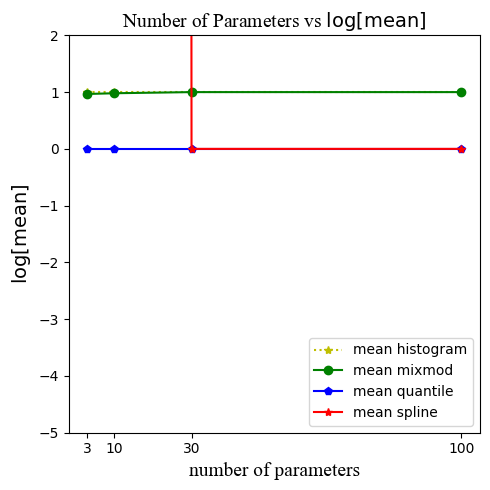

In [115]:
number_of_parameters = [3, 10, 30, 100]
mean_histogram = [1.00e+00 +- 2.22e-16, 1.00e+00 +- 2.22e-16, 1.00e+00 +- 2.08e-16, 1.00e+00 +- 2.83e-16]
mean_mixmod = [1.00e+00 +- 3.29e-02, 1.00e+00 +- 2.01e-02, 1.00e+00 +- 8.86e-07, 1.00e+00 +- 3.16e-06]
mean_quant = [1.67e-05 +- 2.47e-06, 1.67e-05 +- 1.67e-06, 1.67e-05 +- 8.97e-07, 1.67e-05 +- 4.45e-07]
mean_spline = [6.43e+01 +- 2.14e-14, 2.75e+03 +- 1.11e+03, 0, 0]
plt.figure(figsize = (5, 5))
plt.plot(number_of_parameters, mean_histogram, 'y:*', label='mean histogram')
plt.plot(number_of_parameters, mean_mixmod, 'g-o', label='mean mixmod')
plt.plot(number_of_parameters, mean_quant, 'b-p', label='mean quantile')
plt.plot(number_of_parameters, mean_spline, 'r-*', label='mean spline')
plt.xlabel('number of parameters', fontsize = 14, fontname = 'Times New Roman')
plt.ylabel(r'$\log[\mathrm{mean}]$', fontsize = 14, fontname = 'Times New Roman')
plt.title(r'Number of Parameters vs $\log[\mathrm{mean}]$', fontsize = 14, fontname = 'Times New Roman')
plt.legend(loc = 'lower right')
plt.ylim([-5., 2.])
plt.xticks([3, 10, 30, 100])

# for i, txt in enumerate(mean_histogram):
#     plt.annotate(f'{txt:.2f}', (number_of_parameters[i], mean_histogram[i]), textcoords="offset points", xytext=(0,10), ha='center')
# for i, txt in enumerate(mean_mixmod):
#     plt.annotate(f'{txt:.2e}', (number_of_parameters[i], mean_mixmod[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()

what conclusions can we draw: We can see that the quantile and spline parametizations minimize the the moments at all stored parameter values whil ehaving log[mean] on the y axis. The histogram and mixmod and similar and do a bit worse than the 2 just described, however it seems that at smaller number of stored parameters, the mixmod does better than the histogram. We will now look at the variance.

**VARIANCE**

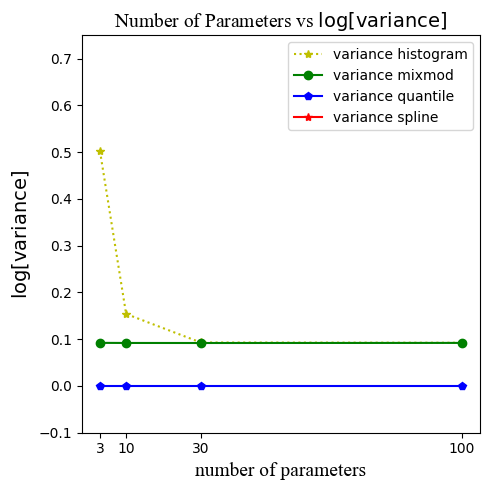

In [119]:
number_of_parameters = [3, 10, 30, 100]
variance_histogram = [5.02e-01, 1.54e-01, 9.30e-02, 9.24e-02]
variance_mixmod = [9.22e-02, 9.20e-02, 9.19e-02, 9.21e-02]
variance_quant = [1.58e-06, 1.60e-06, 1.57e-06, 1.55e-06]
variance_spline = [1.64e+05, 1.64e+05, 1.64e+05, 3.67e+05]
plt.figure(figsize = (5, 5))
plt.plot(number_of_parameters, variance_histogram, 'y:*', label='variance histogram')
plt.plot(number_of_parameters, variance_mixmod, 'g-o', label='variance mixmod')
plt.plot(number_of_parameters, variance_quant, 'b-p', label='variance quantile')
plt.plot(number_of_parameters, variance_spline, 'r-*', label='variance spline')
plt.xlabel('number of parameters', fontsize = 14, fontname = 'Times New Roman')
plt.ylabel(r'$\log[\mathrm{variance}]$', fontsize = 14, fontname = 'Times New Roman')
plt.title(r'Number of Parameters vs $\log[\mathrm{variance}]$', fontsize = 14, fontname = 'Times New Roman')
plt.legend(loc = 'upper right')
plt.ylim([-0.1, 0.75])
plt.xticks([3, 10, 30, 100])

# for i, txt in enumerate(mean_histogram):
#     plt.annotate(f'{txt:.2f}', (number_of_parameters[i], mean_histogram[i]), textcoords="offset points", xytext=(0,10), ha='center')
# for i, txt in enumerate(mean_mixmod):
#     plt.annotate(f'{txt:.2e}', (number_of_parameters[i], mean_mixmod[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()

what conclusions can we draw: In terms of variance, we can see that the quantile parameterization minimizes variance and so does the spline model at lower number of stored parameters before it becomes negative. As the number of stored parameters gets larger the histogram does a better job at minimizing the variance but not at lower number of stored parameters. Finally, the mixmod model has also a pretty low value across all stored parameters.

**SKEWNESS**

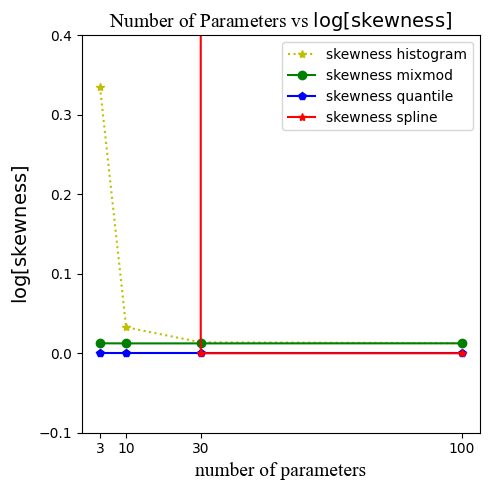

In [117]:
number_of_parameters = [3, 10, 30, 100]
skewness_histogram = [3.35e-01, 3.27e-02, 1.38e-02, 1.26e-02]
skewness_mixmod = [1.25e-02, 1.24e-02, 1.24e-02, 1.25e-02]
skewness_quant = [2.31e-07, 2.33e-07, 2.24e-07, 2.13e-07]
skewness_spline = [3.10e+02, 1.55e+04, 0, 0]
plt.figure(figsize = (5, 5))
plt.plot(number_of_parameters, skewness_histogram, 'y:*', label='skewness histogram')
plt.plot(number_of_parameters, skewness_mixmod, 'g-o', label='skewness mixmod')
plt.plot(number_of_parameters, skewness_quant, 'b-p', label='skewness quantile')
plt.plot(number_of_parameters, skewness_spline, 'r-*', label='skewness spline')
plt.xlabel('number of parameters', fontsize = 14, fontname = 'Times New Roman')
plt.ylabel(r'$\log[\mathrm{skewness}]$', fontsize = 14, fontname = 'Times New Roman')
plt.title(r'Number of Parameters vs $\log[\mathrm{skewness}]$', fontsize = 14, fontname = 'Times New Roman')
plt.legend(loc = 'upper right')
plt.ylim([-0.1, 0.40])
plt.xticks([3, 10, 30, 100])

# for i, txt in enumerate(mean_histogram):
#     plt.annotate(f'{txt:.2f}', (number_of_parameters[i], mean_histogram[i]), textcoords="offset points", xytext=(0,10), ha='center')
# for i, txt in enumerate(mean_mixmod):
#     plt.annotate(f'{txt:.2e}', (number_of_parameters[i], mean_mixmod[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()

what conclusions can we draw: Overall, the mixmod lowers the skewness moment at all numbers of stored parameters followed by quantile then spline. Same as the variance plot above, the histogram seems to minimze skewness as the number of stored parameters increases. 

Overall conclusions: Mixmod and quantile are the best types of models over all number of stored parameterizations. The histogram model begins to get better at 30 and then 100 parameters. 

perecnt error would be the (actual mean - approxmate mean at 3 parameters)/(actual mean) * 100%

**plotting number of stored parameters vs approximation of pdf moment log10 percent errors**

first change the grid values which are the parameters: lets do 3 parameters first.

In [66]:
ens_g3 = qp.convert(ens, 'interp', xvals=np.linspace(0, 3, 4))

In [67]:
ens_g10 = qp.convert(ens, 'interp', xvals=np.linspace(0, 3, 11))

In [68]:
ens_g30 = qp.convert(ens, 'interp', xvals=np.linspace(0, 3, 31))

In [69]:
ens_g100 = qp.convert(ens, 'interp', xvals=np.linspace(0, 3, 101))

In [106]:
ensembles = [ens_h3, ens_s3, ens_q3, ens_m3]
which_moments = range(3)
all_moments = []
for ens in ensembles:
    moments = []
    for n in which_moments:
        moms = qp.metrics.calculate_moment(ens[3], n, limits=(-3, 3))
        moments.append("%.2e +- %.2e" % (moms.mean(), moms.std()))
    all_moments.append(moments)
    
print('moments: '+str(which_moments))
for ens, mom in zip(ensembles, all_moments):
    print(ens.gen_class.name+': '+str(mom))

moments: range(0, 3)
hist: ['1.00e+00 +- 0.00e+00', '5.02e-01 +- 0.00e+00', '3.35e-01 +- 0.00e+00']
spline: ['6.43e+01 +- 0.00e+00', '-1.32e+02 +- 0.00e+00', '3.10e+02 +- 0.00e+00']
quant: ['1.67e-03 +- 0.00e+00', '1.78e-04 +- 0.00e+00', '2.19e-05 +- 0.00e+00']
mixmod: ['1.00e+00 +- 0.00e+00', '1.08e-01 +- 0.00e+00', '1.29e-02 +- 0.00e+00']


In [107]:
ensembles = [ens_h10, ens_s10, ens_q10, ens_m10]
which_moments = range(3)
all_moments = []
for ens in ensembles:
    moments = []
    for n in which_moments:
        moms = qp.metrics.calculate_moment(ens[10], n, limits=(-3, 3))
        moments.append("%.2e +- %.2e" % (moms.mean(), moms.std()))
    all_moments.append(moments)
    
print('moments: '+str(which_moments))
for ens, mom in zip(ensembles, all_moments):
    print(ens.gen_class.name+': '+str(mom))

moments: range(0, 3)
hist: ['1.00e+00 +- 0.00e+00', '1.51e-01 +- 0.00e+00', '3.01e-02 +- 0.00e+00']
spline: ['-2.29e+03 +- 0.00e+00', '5.33e+03 +- 0.00e+00', '-1.31e+04 +- 0.00e+00']
quant: ['1.67e-03 +- 0.00e+00', '2.86e-04 +- 0.00e+00', '5.00e-05 +- 0.00e+00']
mixmod: ['1.00e+00 +- 0.00e+00', '1.72e-01 +- 0.00e+00', '3.02e-02 +- 0.00e+00']


In [85]:
ensembles = [ens_h10, ens_s10, ens_q10, ens_m10]
which_moments = range(3)
all_moments = []
for ens in ensembles:
    moments = []
    for n in which_moments:
        moms = qp.metrics.calculate_moment(ens[30], n, limits=(-3, 3))
        moments.append("%.2e +- %.2e" % (moms.mean(), moms.std()))
    all_moments.append(moments)
    
print('moments: '+str(which_moments))
for ens, mom in zip(ensembles, all_moments):
    print(ens.gen_class.name+': '+str(mom))

moments: range(0, 3)
hist: ['1.00e+00 +- 0.00e+00', '1.51e-01 +- 0.00e+00', '3.01e-02 +- 0.00e+00']
spline: ['3.00e+03 +- 0.00e+00', '-6.90e+03 +- 0.00e+00', '1.69e+04 +- 0.00e+00']
quant: ['1.67e-03 +- 0.00e+00', '1.38e-04 +- 0.00e+00', '1.26e-05 +- 0.00e+00']
mixmod: ['1.00e+00 +- 0.00e+00', '8.05e-02 +- 0.00e+00', '7.13e-03 +- 0.00e+00']


**trying something**

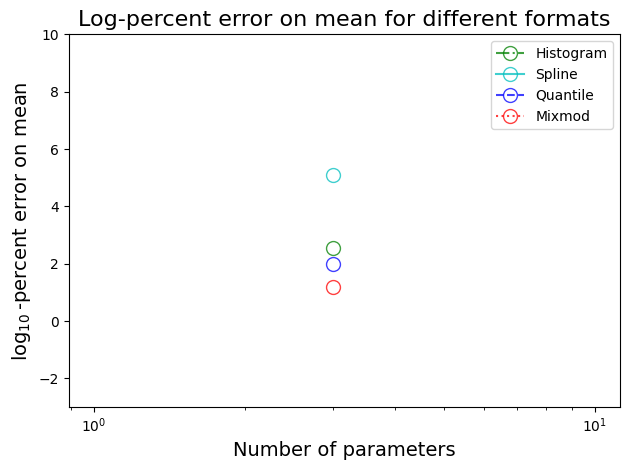

In [89]:
def calculate_mean_log_percent_error(true_ensemble, approx_ensemble, moment_index=1):
    true_moments = qp.metrics.calculate_moment(true_ensemble, moment_index, limits=(-3, 3))
    approx_moments = qp.metrics.calculate_moment(approx_ensemble, moment_index, limits=(-3, 3))
    percent_error = np.abs((approx_moments.mean() - true_moments.mean()) / true_moments.mean()) * 100
    return percent_error

def plot_pz_delta_mean_ensembles(true_ensemble, approx_ensembles, names, n_params=3):
    colors = {'quantile': 'b', 'histogram': 'g', 'mixmod': 'r', 'spline': 'c'}
    styles = {'quantile': '--', 'histogram': '-.', 'mixmod': ':', 'spline': '-'}
    marksize = 10

    fig, ax = plt.subplots()

    for approx_ensemble, name in zip(approx_ensembles, names):
        mean = calculate_mean_log_percent_error(true_ensemble, approx_ensemble, moment_index=1)
        log_mean = np.log10(mean)

        ax.plot(n_params, log_mean, 'o', label=name, 
                color=colors[name.lower()], linestyle=styles[name.lower()],
                mfc='none', markersize=marksize, alpha=0.75)

    ax.set_xscale('log')
    ax.set_xlabel('Number of parameters', fontsize=14)
    ax.set_ylabel(r'$\log_{10}$-percent error on mean', fontsize=14)
    ax.set_title('Log-percent error on mean for different formats', fontsize=16)
    ax.legend()
    ax.set_ylim(-3, 10)  # Set y-axis limits from -3 to 10
    fig.tight_layout()
    plt.show()

# Define your true ensemble and approximations with 3 parameters
true_ensemble = ens[3]

# Define the list of approximations and their names
approx_ensembles = [ens_h3, ens_s3, ens_q3, ens_m3]
names = ['Histogram', 'Spline', 'Quantile', 'Mixmod']

# Plot
plot_pz_delta_mean_ensembles(true_ensemble, approx_ensembles, names, n_params=3)


In [150]:
def calculate_mean_log_percent_error(true_ensemble, approx_ensemble, moment_index=1):
    true_moments = qp.metrics.calculate_moment(true_ensemble, moment_index, limits=(-3, 3))
    approx_moments = qp.metrics.calculate_moment(approx_ensemble, moment_index, limits=(-3, 3))
    percent_error = np.abs((approx_moments.mean() - true_moments.mean()) / true_moments.mean()) * 100
    return percent_error

def plot_pz_delta_mean_ensembles(true_ensemble, approx_ensembles, names, n_params=10):
    colors = {'quantile': 'b', 'histogram': 'g', 'mixmod': 'r', 'spline': 'c'}
    styles = {'quantile': '--', 'histogram': '-.', 'mixmod': ':', 'spline': '-'}
    marksize = 10

    fig, ax = plt.subplots()

    for approx_ensemble, name in zip(approx_ensembles, names):
        mean = calculate_mean_log_percent_error(true_ensemble, approx_ensemble, moment_index=1)
        log_mean = np.log10(mean)

        ax.plot(n_params, log_mean, 'o', label=name, 
                color=colors[name.lower()], linestyle=styles[name.lower()],
                mfc='none', markersize=marksize, alpha=0.75)

    ax.set_xscale('log')
    ax.set_xlabel('Number of parameters', fontsize=14)
    ax.set_ylabel(r'$\log_{10}$-percent error on mean', fontsize=14)
    ax.set_title('Log-percent error on mean for different formats', fontsize=16)
    ax.legend()
    ax.set_ylim(-3, 10)  # Set y-axis limits from -3 to 10
    fig.tight_layout()
    plt.show()

# Define your true ensemble and approximations with 10 parameters
true_ensemble = ens[10]

# Define the list of approximations and their names
approx_ensembles = [ens_h10, ens_s10, ens_q10, ens_m10]
names = ['Histogram', 'Spline', 'Quantile', 'Mixmod']

# Plot
plot_pz_delta_mean_ensembles(true_ensemble, approx_ensembles, names, n_params=10)

IndexError: index 10 is out of bounds for axis 0 with size 2

7/4 - 7/11

The medians of mean of the log-KLD distributions for the dataset as a function of the number of stored parameters for the different approximations

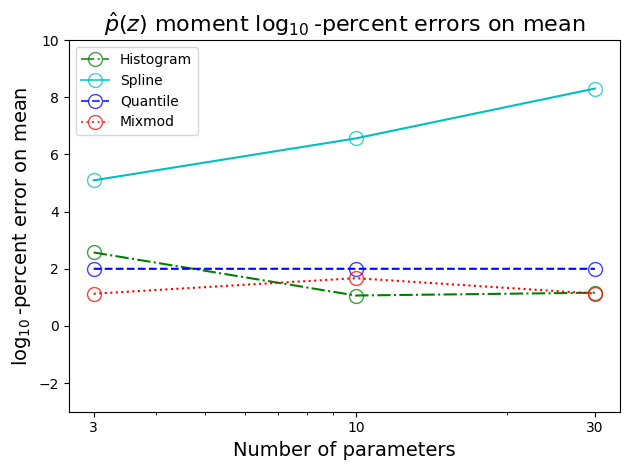

In [105]:
def calculate_mean_log_percent_error(true_ensemble, approx_ensemble, moment_index=1):
    true_moments = qp.metrics.calculate_moment(true_ensemble, moment_index, limits=(-3, 3))
    approx_moments = qp.metrics.calculate_moment(approx_ensemble, moment_index, limits=(-3, 3))
    percent_error = np.abs((approx_moments.mean() - true_moments.mean()) / true_moments.mean()) * 100
    return percent_error

def plot_pz_delta_mean_ensembles(true_ensembles, approx_ensembles_sets, names, params):
    colors = {'quantile': 'b', 'histogram': 'g', 'mixmod': 'r', 'spline': 'c'}
    styles = {'quantile': '--', 'histogram': '-.', 'mixmod': ':', 'spline': '-'}
    marksize = 10

    fig, ax = plt.subplots()

    for approx_ensembles, name in zip(zip(*approx_ensembles_sets), names):
        log_means = []
        for param, true_ensemble, approx_ensemble in zip(params, true_ensembles, approx_ensembles):
            mean = calculate_mean_log_percent_error(true_ensemble, approx_ensemble, moment_index=1)
            log_mean = np.log10(mean)
            log_means.append(log_mean)
            ax.plot(param, log_mean, 'o', label=f'{name} ({param} params)', 
                    color=colors[name.lower()], linestyle=styles[name.lower()],
                    mfc='none', markersize=marksize, alpha=0.75)
        ax.plot(params, log_means, color=colors[name.lower()], linestyle=styles[name.lower()])

    ax.set_xscale('log')
    ax.set_xticks(params)  # Set x-ticks
    ax.set_xticklabels([str(p) for p in params])
    ax.set_xlabel('Number of parameters', fontsize=14)
    ax.set_ylabel(r'$\log_{10}$-percent error on mean', fontsize=14)
    ax.set_title(r'$\hat{p}(z)$ moment $\log_{10}$-percent errors on mean', fontsize=16)

    # Combine unique labels for the legend
    handles, labels = ax.get_legend_handles_labels()
    unique_labels = []
    unique_handles = []
    for handle, label in zip(handles, labels):
        name = label.split('(')[0].strip()
        if name not in unique_labels:
            unique_labels.append(name)
            unique_handles.append(handle)

    ax.legend(unique_handles, unique_labels)
    ax.set_ylim(-3, 10)  # Set y-axis limits
    fig.tight_layout()
    plt.show()

# Define ens
true_ensembles = [ens[3], ens[10], ens[30]]
approx_ensembles_3 = [ens_h3, ens_s3, ens_q3, ens_m3]
approx_ensembles_10 = [ens_h10, ens_s10, ens_q10, ens_m10]
approx_ensembles_30 = [ens_h30, ens_s30, ens_q30, ens_m30]

# Combine all approximation sets
approx_ensembles_sets = [approx_ensembles_3, approx_ensembles_10, approx_ensembles_30]

# Names
names = ['Histogram', 'Spline', 'Quantile', 'Mixmod']

# Define the number of parameters for each set
params = [3, 10, 30]

# Plot
plot_pz_delta_mean_ensembles(true_ensembles, approx_ensembles_sets, names, params)


My analysis: The percent errors of the mean moment of the approximate photo-z PDF ensemble's log-KLD distribution are overall lower in the mixture model. The spline format has the highest percent errors at all numbers of stored parameters. The inclusion of Nf = 10 decreases the moment percent error of the hisotgram format quite significantly than the other formats to the point that they have comparable moment percent errors for mean.

**Now I'm gonna work on the median log10 percent error on variance which is the second moment**

The medians of variance of the log-KLD distributions for the dataset as a function of the number of stored parameters for the different approximations

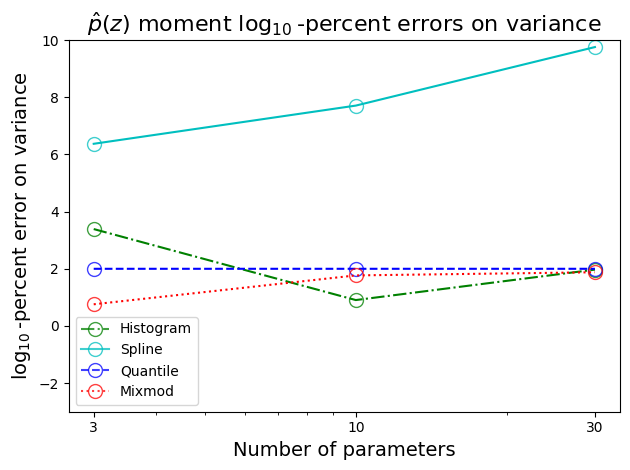

In [112]:
def calculate_variance_log_percent_error(true_ensemble, approx_ensemble, moment_index=2):
    true_moments = qp.metrics.calculate_moment(true_ensemble, moment_index, limits=(-3, 3))
    approx_moments = qp.metrics.calculate_moment(approx_ensemble, moment_index, limits=(-3, 3))
    percent_error = np.abs((approx_moments.mean() - true_moments.mean()) / true_moments.mean()) * 100
    return percent_error

def plot_pz_delta_variance_ensembles(true_ensembles, approx_ensembles_sets, names, params):
    colors = {'quantile': 'b', 'histogram': 'g', 'mixmod': 'r', 'spline': 'c'}
    styles = {'quantile': '--', 'histogram': '-.', 'mixmod': ':', 'spline': '-'}
    marksize = 10

    fig, ax = plt.subplots()

    for approx_ensembles, name in zip(zip(*approx_ensembles_sets), names):
        log_variances = []
        for param, true_ensemble, approx_ensemble in zip(params, true_ensembles, approx_ensembles):
            variance = calculate_variance_log_percent_error(true_ensemble, approx_ensemble, moment_index=2)
            log_variance = np.log10(variance)
            log_variances.append(log_variance)
            ax.plot(param, log_variance, 'o', label=f'{name} ({param} params)', 
                    color=colors[name.lower()], linestyle=styles[name.lower()],
                    mfc='none', markersize=marksize, alpha=0.75)
        ax.plot(params, log_variances, color=colors[name.lower()], linestyle=styles[name.lower()])

    ax.set_xscale('log')
    ax.set_xticks(params)  # Set x-ticks
    ax.set_xticklabels([str(p) for p in params])
    ax.set_xlabel('Number of parameters', fontsize=14)
    ax.set_ylabel(r'$\log_{10}$-percent error on variance', fontsize=14)
    ax.set_title(r'$\hat{p}(z)$ moment $\log_{10}$-percent errors on variance', fontsize=16)

    # Combine unique labels for the legend
    handles, labels = ax.get_legend_handles_labels()
    unique_labels = []
    unique_handles = []
    for handle, label in zip(handles, labels):
        name = label.split('(')[0].strip()
        if name not in unique_labels:
            unique_labels.append(name)
            unique_handles.append(handle)

    ax.legend(unique_handles, unique_labels)
    ax.set_ylim(-3, 10)  # Set y-axis limits
    fig.tight_layout()
    plt.show()

# Define ens
true_ensembles = [ens[3], ens[10], ens[30]]
approx_ensembles_3 = [ens_h3, ens_s3, ens_q3, ens_m3]
approx_ensembles_10 = [ens_h10, ens_s10, ens_q10, ens_m10]
approx_ensembles_30 = [ens_h30, ens_s30, ens_q30, ens_m30]

# Combine all approximation sets
approx_ensembles_sets = [approx_ensembles_3, approx_ensembles_10, approx_ensembles_30]

# Names
names = ['Histogram', 'Spline', 'Quantile', 'Mixmod']

# Define the number of parameters for each set
params = [3, 10, 30]

# Plot
plot_pz_delta_variance_ensembles(true_ensembles, approx_ensembles_sets, names, params)


My analysis: Similar to the log10 percent errors on mean, we see a constant increase in percent error on variance for the spline across all number of stored parameters. We see a similar shape across the formats as we saw in the percent error on mean. overall, it seems as though the mixmod format is still the best at lowering the percent error.

**Now I will calculate the median log10 percent error on skewness for these formats**

The medians of skewness of the log-KLD distributions for the dataset as a function of the number of stored parameters for the different approximations

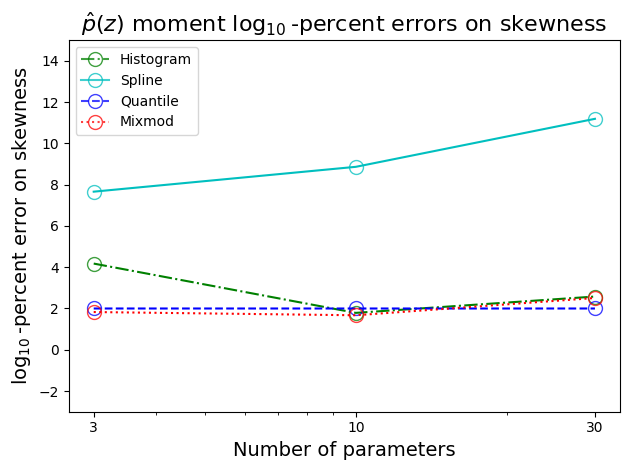

In [115]:
def calculate_skewness_log_percent_error(true_ensemble, approx_ensemble, moment_index=3):
    true_moments = qp.metrics.calculate_moment(true_ensemble, moment_index, limits=(-3, 3))
    approx_moments = qp.metrics.calculate_moment(approx_ensemble, moment_index, limits=(-3, 3))
    percent_error = np.abs((approx_moments.mean() - true_moments.mean()) / true_moments.mean()) * 100
    return percent_error

def plot_pz_delta_skewness_ensembles(true_ensembles, approx_ensembles_sets, names, params):
    colors = {'quantile': 'b', 'histogram': 'g', 'mixmod': 'r', 'spline': 'c'}
    styles = {'quantile': '--', 'histogram': '-.', 'mixmod': ':', 'spline': '-'}
    marksize = 10

    fig, ax = plt.subplots()

    for approx_ensembles, name in zip(zip(*approx_ensembles_sets), names):
        log_skewnesses = []
        for param, true_ensemble, approx_ensemble in zip(params, true_ensembles, approx_ensembles):
            skewness = calculate_skewness_log_percent_error(true_ensemble, approx_ensemble, moment_index=3)
            log_skewness = np.log10(skewness)
            log_skewnesses.append(log_skewness)
            ax.plot(param, log_skewness, 'o', label=f'{name} ({param} params)', 
                    color=colors[name.lower()], linestyle=styles[name.lower()],
                    mfc='none', markersize=marksize, alpha=0.75)
        ax.plot(params, log_skewnesses, color=colors[name.lower()], linestyle=styles[name.lower()])

    ax.set_xscale('log')
    ax.set_xticks(params)  # Set x-ticks
    ax.set_xticklabels([str(p) for p in params])
    ax.set_xlabel('Number of parameters', fontsize=14)
    ax.set_ylabel(r'$\log_{10}$-percent error on skewness', fontsize=14)
    ax.set_title(r'$\hat{p}(z)$ moment $\log_{10}$-percent errors on skewness', fontsize=16)

    # Combine unique labels for the legend
    handles, labels = ax.get_legend_handles_labels()
    unique_labels = []
    unique_handles = []
    for handle, label in zip(handles, labels):
        name = label.split('(')[0].strip()
        if name not in unique_labels:
            unique_labels.append(name)
            unique_handles.append(handle)

    ax.legend(unique_handles, unique_labels)
    ax.set_ylim(-3, 15)  # Set y-axis limits
    fig.tight_layout()
    plt.show()

# Define ens
true_ensembles = [ens[3], ens[10], ens[30]]
approx_ensembles_3 = [ens_h3, ens_s3, ens_q3, ens_m3]
approx_ensembles_10 = [ens_h10, ens_s10, ens_q10, ens_m10]
approx_ensembles_30 = [ens_h30, ens_s30, ens_q30, ens_m30]

# Combine all approximation sets
approx_ensembles_sets = [approx_ensembles_3, approx_ensembles_10, approx_ensembles_30]

# Names
names = ['Histogram', 'Spline', 'Quantile', 'Mixmod']

# Define the number of parameters for each set
params = [3, 10, 30]

# Plot
plot_pz_delta_skewness_ensembles(true_ensembles, approx_ensembles_sets, names, params)



My analysis: Here, we see that the percent errors on skewness are minimized by the mixmod and quantile formats all all number of stored parameters. The spline still has the highest momemt as compared to the other formats. Although the trends for the histogram seem to be almost the same as the trends shown in the graphs for mean and variance, the quantile and mixmod format seem to be more stable in consistently minimizing the percent errors.

/opt/miniconda3/lib/python3.12/site-packages/qp/logspline_pdf.py:50: RuntimeWarning: invalid value encountered in divide
  return (yvals.T / integrals).T
/opt/miniconda3/lib/python3.12/site-packages/qp/logspline_pdf.py:77: RuntimeWarning: divide by zero encountered in log
  rep = splrep(xrow, np.log(yrow)) # CMS
/opt/miniconda3/lib/python3.12/site-packages/qp/logspline_pdf.py:252: RuntimeWarning: divide by zero encountered in log
  xv, (self._splx[irow], np.log(self._sply[irow]), self._spln[irow].item())) #CMS


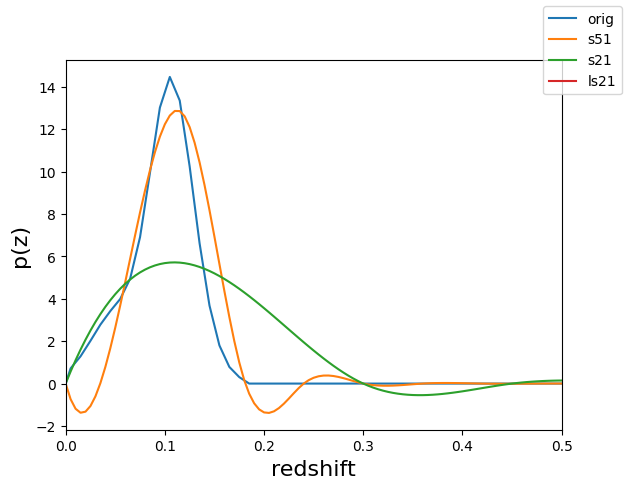

In [90]:
ens_s21 = qp.convert(ens_red, 'spline', xvals=np.linspace(0, 3.0, 21), method="xy")
ens_s51 = qp.convert(ens_red, 'spline', xvals=np.linspace(0, 3.0, 51), method="xy")
ens_ls = qp.convert(ens_red, 'logspline', xvals=np.linspace(0, 3.0, 21), method="xy")
key = 0
axes_s = ens_red.plot(key, xlim=(0, 0.5), label="orig")
_ = ens_s51.plot(key, axes=axes_s, label="s51")
_ = ens_s21.plot(key, axes=axes_s, label="s21")
_ = ens_ls.plot(key, axes=axes_s, label="ls21")
leg_s = axes_s.figure.legend()

**calculating KLD for logspline**

In [133]:
ens_ls6 = qp.convert(ens, 'logspline', xvals=np.linspace(0, 3.0, 6), method="xy")
lsklds = qp.metrics.calculate_kld(ens, ens_ls6, limits=symm_lims)
print(lsklds)

[1. 1.]
[1. 1.]
Calculated K-L Divergences:
[-5.29976996e-19 -4.91436175e-19]
Reference Distribution:
[[0.00354956 0.00358524 0.0036209  0.00365655 0.00369218 0.00372778
  0.00376334 0.00379886 0.00383433 0.00386973 0.00390507 0.00394034
  0.00397552 0.00401061 0.0040456  0.00408048 0.00411525 0.00414989
  0.00418441 0.00421879 0.00425301 0.00428709 0.004321   0.00435473
  0.00438829 0.00442166 0.00445484 0.00448781 0.00452056 0.0045531
  0.00458541 0.00461747 0.0046493  0.00468087 0.00471218 0.00474322
  0.00477398 0.00480446 0.00483464 0.00486452 0.00489409 0.00492334
  0.00495227 0.00498087 0.00500912 0.00503702 0.00506457 0.00509176
  0.00511857 0.00514501 0.00517106 0.00519672 0.00522197 0.00524682
  0.00527126 0.00529527 0.00531886 0.00534201 0.00536472 0.00538698
  0.00540879 0.00543014 0.00545102 0.00547143 0.00549137 0.00551081
  0.00552977 0.00554823 0.0055662  0.00558365 0.0056006  0.00561703
  0.00563294 0.00564832 0.00566317 0.00567749 0.00569127 0.00570451
  0.0057172  0.

Checking RMSE for logspline

In [142]:
ens_ls6 = qp.convert(ens, 'logspline', xvals=np.linspace(0, 3.0, 6), method="xy")
ensembles = (ens, ens_s6, ens_h6, ens_q6, ens_ls6)
for ensemble in ensembles[1:]:
    D = []
    for lims in all_lims:
        rmses = qp.metrics.calculate_rmse(ens, ensemble, limits=lims)
        D.append("%.2e +- %.2e" % (rmses.mean(), rmses.std()))
    print(ensemble.gen_class.name + ' approximation: RMSE over 1, 2, 3, sigma ranges = ' + str(D))

spline approximation: RMSE over 1, 2, 3, sigma ranges = ['1.92e-01 +- 1.23e-01', '4.50e-01 +- 3.00e-01', '1.27e+00 +- 1.08e+00']
hist approximation: RMSE over 1, 2, 3, sigma ranges = ['2.29e-01 +- 1.10e-01', '1.79e-01 +- 8.62e-02', '1.48e-01 +- 6.91e-02']
quant approximation: RMSE over 1, 2, 3, sigma ranges = ['3.03e-01 +- 3.95e-02', '2.59e-01 +- 4.94e-03', '2.16e-01 +- 1.22e-04']
logspline approximation: RMSE over 1, 2, 3, sigma ranges = ['2.02e-01 +- 1.43e-01', '1.61e-01 +- 1.05e-01', '1.33e-01 +- 8.47e-02']


Conclusions: It seems that generally, the logspline approximation is closer to the original ensemble as compared to the other formats in all regions

checking KLD

In [143]:
# Loop over all the other ensemble types
for ensemble in ensembles[1:]:
    D = []
    for lims in all_lims:
        klds = qp.metrics.calculate_kld(ens, ensemble, limits=lims)
        D.append("%.2e +- %.2e" % (klds.mean(), klds.std()))
    print(ensemble.gen_class.name + ' approximation: KLD over 1, 2, 3, sigma ranges = ' + str(D))

Negative Values in qn(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20]))
[1. 1.]
[1. 1.]
Negative Values in qn(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), array([  0,   1,   2,   3,   4,   5,   6,   7,   8,

In [152]:
ens_ls3 = qp.convert(ens, 'logspline', xvals=np.linspace(0, 3.0, 4), method="xy")
ens_ls10 = qp.convert(ens, 'logspline', xvals=np.linspace(0, 3.0, 11), method="xy")
ens_ls30 = qp.convert(ens, 'logspline', xvals=np.linspace(0, 3.0, 31), method="xy")

In [172]:
ens = qp.read('qp_test_ensemble.hf5')

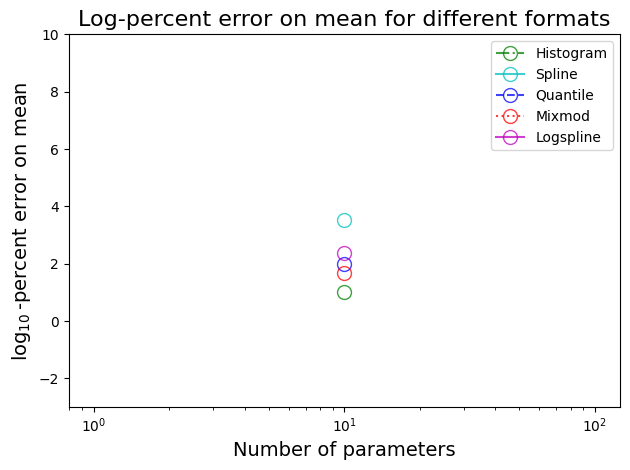

In [173]:
def calculate_mean_log_percent_error(true_ensemble, approx_ensemble, moment_index=1):
    true_moments = qp.metrics.calculate_moment(true_ensemble, moment_index, limits=(-3, 3))
    approx_moments = qp.metrics.calculate_moment(approx_ensemble, moment_index, limits=(-3, 3))
    percent_error = np.abs((approx_moments.mean() - true_moments.mean()) / true_moments.mean()) * 100
    return percent_error

def plot_pz_delta_mean_ensembles(true_ensemble, approx_ensembles, names, n_params=10):
    colors = {'quantile': 'b', 'histogram': 'g', 'mixmod': 'r', 'spline': 'c', 'logspline': 'm'}
    styles = {'quantile': '--', 'histogram': '-.', 'mixmod': ':', 'spline': '-', 'logspline': '-'}
    marksize = 10

    fig, ax = plt.subplots()

    for approx_ensemble, name in zip(approx_ensembles, names):
        mean = calculate_mean_log_percent_error(true_ensemble, approx_ensemble, moment_index=1)
        log_mean = np.log10(mean)

        ax.plot(n_params, log_mean, 'o', label=name, 
                color=colors[name.lower()], linestyle=styles[name.lower()],
                mfc='none', markersize=marksize, alpha=0.75)

    ax.set_xscale('log')
    ax.set_xlabel('Number of parameters', fontsize=14)
    ax.set_ylabel(r'$\log_{10}$-percent error on mean', fontsize=14)
    ax.set_title('Log-percent error on mean for different formats', fontsize=16)
    ax.legend()
    ax.set_ylim(-3, 10)  # Set y-axis limits from -3 to 10
    fig.tight_layout()
    plt.show()

# Define your true ensemble and approximations with 10 parameters
true_ensemble = ens[10]

# Define the list of approximations and their names
approx_ensembles = [ens_h10, ens_s10, ens_q10, ens_m10, ens_ls10]
names = ['Histogram', 'Spline', 'Quantile', 'Mixmod', 'Logspline']

# Plot
plot_pz_delta_mean_ensembles(true_ensemble, approx_ensembles, names, n_params=10)

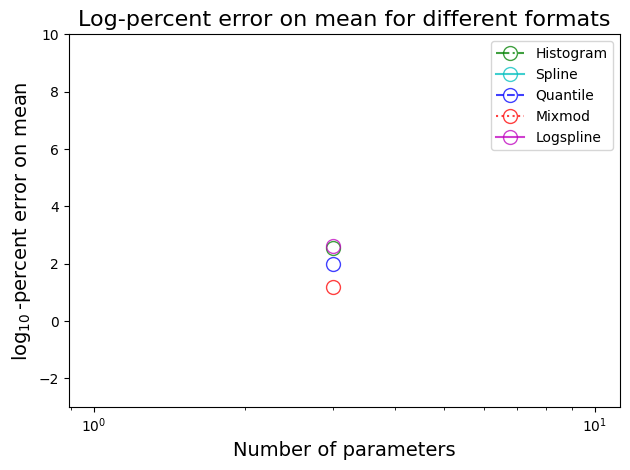

In [174]:
def calculate_mean_log_percent_error(true_ensemble, approx_ensemble, moment_index=1):
    true_moments = qp.metrics.calculate_moment(true_ensemble, moment_index, limits=(-3, 3))
    approx_moments = qp.metrics.calculate_moment(approx_ensemble, moment_index, limits=(-3, 3))
    percent_error = np.abs((approx_moments.mean() - true_moments.mean()) / true_moments.mean()) * 100
    return percent_error

def plot_pz_delta_mean_ensembles(true_ensemble, approx_ensembles, names, n_params=3):
    colors = {'quantile': 'b', 'histogram': 'g', 'mixmod': 'r', 'spline': 'c', 'logspline': 'm'}
    styles = {'quantile': '--', 'histogram': '-.', 'mixmod': ':', 'spline': '-', 'logspline': '-'}
    marksize = 10

    fig, ax = plt.subplots()

    for approx_ensemble, name in zip(approx_ensembles, names):
        mean = calculate_mean_log_percent_error(true_ensemble, approx_ensemble, moment_index=1)
        log_mean = np.log10(mean)

        ax.plot(n_params, log_mean, 'o', label=name, 
                color=colors[name.lower()], linestyle=styles[name.lower()],
                mfc='none', markersize=marksize, alpha=0.75)

    ax.set_xscale('log')
    ax.set_xlabel('Number of parameters', fontsize=14)
    ax.set_ylabel(r'$\log_{10}$-percent error on mean', fontsize=14)
    ax.set_title('Log-percent error on mean for different formats', fontsize=16)
    ax.legend()
    ax.set_ylim(-3, 10)  # Set y-axis limits from -3 to 10
    fig.tight_layout()
    plt.show()

# Define your true ensemble and approximations with 3 parameters
true_ensemble = ens[3]

# Define the list of approximations and their names
approx_ensembles = [ens_h3, ens_s3, ens_q3, ens_m3, ens_ls3]
names = ['Histogram', 'Spline', 'Quantile', 'Mixmod', 'Logspline']

# Plot
plot_pz_delta_mean_ensembles(true_ensemble, approx_ensembles, names, n_params=3)

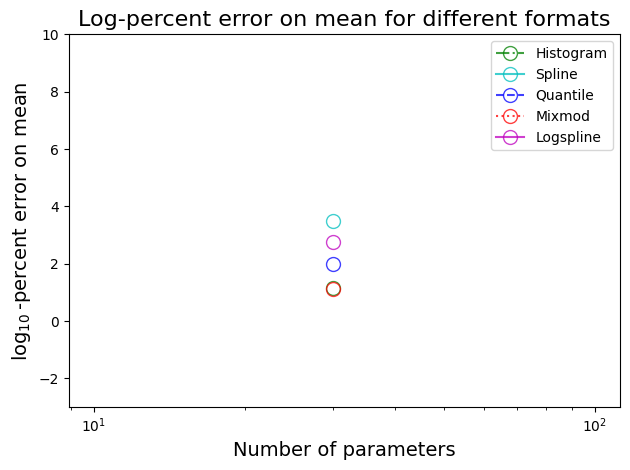

In [175]:
def calculate_mean_log_percent_error(true_ensemble, approx_ensemble, moment_index=1):
    true_moments = qp.metrics.calculate_moment(true_ensemble, moment_index, limits=(-3, 3))
    approx_moments = qp.metrics.calculate_moment(approx_ensemble, moment_index, limits=(-3, 3))
    percent_error = np.abs((approx_moments.mean() - true_moments.mean()) / true_moments.mean()) * 100
    return percent_error

def plot_pz_delta_mean_ensembles(true_ensemble, approx_ensembles, names, n_params=3):
    colors = {'quantile': 'b', 'histogram': 'g', 'mixmod': 'r', 'spline': 'c', 'logspline': 'm'}
    styles = {'quantile': '--', 'histogram': '-.', 'mixmod': ':', 'spline': '-', 'logspline': '-'}
    marksize = 10

    fig, ax = plt.subplots()

    for approx_ensemble, name in zip(approx_ensembles, names):
        mean = calculate_mean_log_percent_error(true_ensemble, approx_ensemble, moment_index=1)
        log_mean = np.log10(mean)

        ax.plot(n_params, log_mean, 'o', label=name, 
                color=colors[name.lower()], linestyle=styles[name.lower()],
                mfc='none', markersize=marksize, alpha=0.75)

    ax.set_xscale('log')
    ax.set_xlabel('Number of parameters', fontsize=14)
    ax.set_ylabel(r'$\log_{10}$-percent error on mean', fontsize=14)
    ax.set_title('Log-percent error on mean for different formats', fontsize=16)
    ax.legend()
    ax.set_ylim(-3, 10)  # Set y-axis limits from -3 to 10
    fig.tight_layout()
    plt.show()

# Define your true ensemble and approximations with 3 parameters
true_ensemble = ens[30]

# Define the list of approximations and their names
approx_ensembles = [ens_h30, ens_s30, ens_q30, ens_m30, ens_ls30]
names = ['Histogram', 'Spline', 'Quantile', 'Mixmod', 'Logspline']

# Plot
plot_pz_delta_mean_ensembles(true_ensemble, approx_ensembles, names, n_params=30)

The medians of mean of the log-KLD distributions for the dataset as a function of the number of stored parameters for the different approximations including log spline this time.

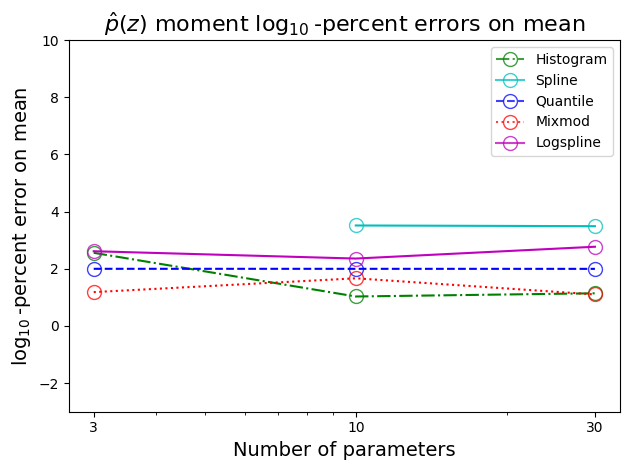

In [176]:
def calculate_mean_log_percent_error(true_ensemble, approx_ensemble, moment_index=1):
    true_moments = qp.metrics.calculate_moment(true_ensemble, moment_index, limits=(-3, 3))
    approx_moments = qp.metrics.calculate_moment(approx_ensemble, moment_index, limits=(-3, 3))
    percent_error = np.abs((approx_moments.mean() - true_moments.mean()) / true_moments.mean()) * 100
    return percent_error

def plot_pz_delta_mean_ensembles(true_ensembles, approx_ensembles_sets, names, params):
    colors = {'quantile': 'b', 'histogram': 'g', 'mixmod': 'r', 'spline': 'c', 'logspline': 'm'}
    styles = {'quantile': '--', 'histogram': '-.', 'mixmod': ':', 'spline': '-', 'logspline': '-'}
    marksize = 10

    fig, ax = plt.subplots()

    for approx_ensembles, name in zip(zip(*approx_ensembles_sets), names):
        log_means = []
        for param, true_ensemble, approx_ensemble in zip(params, true_ensembles, approx_ensembles):
            mean = calculate_mean_log_percent_error(true_ensemble, approx_ensemble, moment_index=1)
            log_mean = np.log10(mean)
            log_means.append(log_mean)
            ax.plot(param, log_mean, 'o', label=f'{name} ({param} params)', 
                    color=colors[name.lower()], linestyle=styles[name.lower()],
                    mfc='none', markersize=marksize, alpha=0.75)
        ax.plot(params, log_means, color=colors[name.lower()], linestyle=styles[name.lower()])

    ax.set_xscale('log')
    ax.set_xticks(params)  # Set x-ticks
    ax.set_xticklabels([str(p) for p in params])
    ax.set_xlabel('Number of parameters', fontsize=14)
    ax.set_ylabel(r'$\log_{10}$-percent error on mean', fontsize=14)
    ax.set_title(r'$\hat{p}(z)$ moment $\log_{10}$-percent errors on mean', fontsize=16)

    # Combine unique labels for the legend
    handles, labels = ax.get_legend_handles_labels()
    unique_labels = []
    unique_handles = []
    for handle, label in zip(handles, labels):
        name = label.split('(')[0].strip()
        if name not in unique_labels:
            unique_labels.append(name)
            unique_handles.append(handle)

    ax.legend(unique_handles, unique_labels)
    ax.set_ylim(-3, 10)  # Set y-axis limits
    fig.tight_layout()
    plt.show()

# Define ens
true_ensembles = [ens[3], ens[10], ens[30]]
approx_ensembles_3 = [ens_h3, ens_s3, ens_q3, ens_m3, ens_ls3]
approx_ensembles_10 = [ens_h10, ens_s10, ens_q10, ens_m10, ens_ls10]
approx_ensembles_30 = [ens_h30, ens_s30, ens_q30, ens_m30, ens_ls30]

# Combine all approximation sets
approx_ensembles_sets = [approx_ensembles_3, approx_ensembles_10, approx_ensembles_30]

# Names
names = ['Histogram', 'Spline', 'Quantile', 'Mixmod', 'Logspline']

# Define the number of parameters for each set
params = [3, 10, 30]

# Plot
plot_pz_delta_mean_ensembles(true_ensembles, approx_ensembles_sets, names, params)

Now on skewness

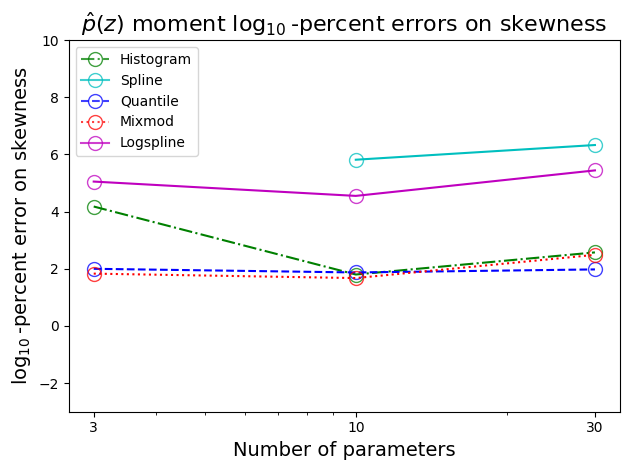

In [179]:
def calculate_skewness_log_percent_error(true_ensemble, approx_ensemble, moment_index=3):
    true_moments = qp.metrics.calculate_moment(true_ensemble, moment_index, limits=(-3, 3))
    approx_moments = qp.metrics.calculate_moment(approx_ensemble, moment_index, limits=(-3, 3))
    percent_error = np.abs((approx_moments.mean() - true_moments.mean()) / true_moments.mean()) * 100
    return percent_error

def plot_pz_delta_skewness_ensembles(true_ensembles, approx_ensembles_sets, names, params):
    colors = {'quantile': 'b', 'histogram': 'g', 'mixmod': 'r', 'spline': 'c', 'logspline': 'm'}
    styles = {'quantile': '--', 'histogram': '-.', 'mixmod': ':', 'spline': '-', 'logspline': '-'}
    marksize = 10

    fig, ax = plt.subplots()

    for approx_ensembles, name in zip(zip(*approx_ensembles_sets), names):
        log_skews = []
        for param, true_ensemble, approx_ensemble in zip(params, true_ensembles, approx_ensembles):
            skew = calculate_skewness_log_percent_error(true_ensemble, approx_ensemble, moment_index=3)
            log_skew = np.log10(skew)
            log_skews.append(log_skew)
            ax.plot(param, log_skew, 'o', label=f'{name} ({param} params)', 
                    color=colors[name.lower()], linestyle=styles[name.lower()],
                    mfc='none', markersize=marksize, alpha=0.75)
        ax.plot(params, log_skews, color=colors[name.lower()], linestyle=styles[name.lower()])

    ax.set_xscale('log')
    ax.set_xticks(params)  # Set x-ticks
    ax.set_xticklabels([str(p) for p in params])
    ax.set_xlabel('Number of parameters', fontsize=14)
    ax.set_ylabel(r'$\log_{10}$-percent error on skewness', fontsize=14)
    ax.set_title(r'$\hat{p}(z)$ moment $\log_{10}$-percent errors on skewness', fontsize=16)

    # Combine unique labels for the legend
    handles, labels = ax.get_legend_handles_labels()
    unique_labels = []
    unique_handles = []
    for handle, label in zip(handles, labels):
        name = label.split('(')[0].strip()
        if name not in unique_labels:
            unique_labels.append(name)
            unique_handles.append(handle)

    ax.legend(unique_handles, unique_labels)
    ax.set_ylim(-3, 10)  # Set y-axis limits
    fig.tight_layout()
    plt.show()

# Define true ensembles
true_ensembles = [ens[3], ens[10], ens[30]]

# Define approximations
approx_ensembles_3 = [ens_h3, ens_s3, ens_q3, ens_m3, ens_ls3]
approx_ensembles_10 = [ens_h10, ens_s10, ens_q10, ens_m10, ens_ls10]
approx_ensembles_30 = [ens_h30, ens_s30, ens_q30, ens_m30, ens_ls30]

# Combine all approximation sets
approx_ensembles_sets = [approx_ensembles_3, approx_ensembles_10, approx_ensembles_30]

# Names
names = ['Histogram', 'Spline', 'Quantile', 'Mixmod', 'Logspline']

# Define the number of parameters for each set
params = [3, 10, 30]

# Plot
plot_pz_delta_skewness_ensembles(true_ensembles, approx_ensembles_sets, names, params)


now on variance

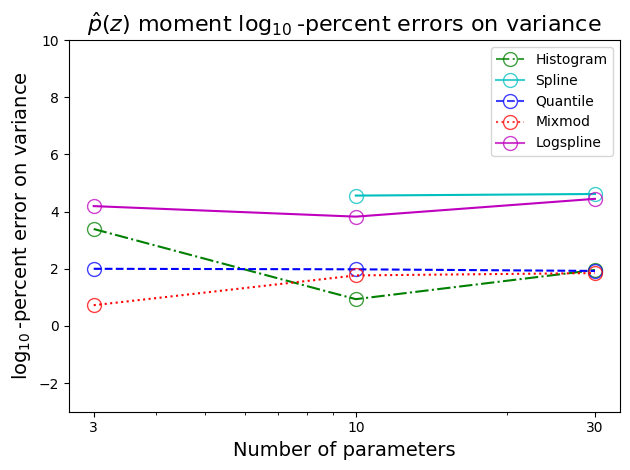

In [180]:
def calculate_variance_log_percent_error(true_ensemble, approx_ensemble, moment_index=2):
    true_moments = qp.metrics.calculate_moment(true_ensemble, moment_index, limits=(-3, 3))
    approx_moments = qp.metrics.calculate_moment(approx_ensemble, moment_index, limits=(-3, 3))
    percent_error = np.abs((approx_moments.mean() - true_moments.mean()) / true_moments.mean()) * 100
    return percent_error

def plot_pz_delta_variance_ensembles(true_ensembles, approx_ensembles_sets, names, params):
    colors = {'quantile': 'b', 'histogram': 'g', 'mixmod': 'r', 'spline': 'c', 'logspline': 'm'}
    styles = {'quantile': '--', 'histogram': '-.', 'mixmod': ':', 'spline': '-', 'logspline': '-'}
    marksize = 10

    fig, ax = plt.subplots()

    for approx_ensembles, name in zip(zip(*approx_ensembles_sets), names):
        log_vars = []
        for param, true_ensemble, approx_ensemble in zip(params, true_ensembles, approx_ensembles):
            var = calculate_variance_log_percent_error(true_ensemble, approx_ensemble, moment_index=2)
            log_var = np.log10(var)
            log_vars.append(log_var)
            ax.plot(param, log_var, 'o', label=f'{name} ({param} params)', 
                    color=colors[name.lower()], linestyle=styles[name.lower()],
                    mfc='none', markersize=marksize, alpha=0.75)
        ax.plot(params, log_vars, color=colors[name.lower()], linestyle=styles[name.lower()])

    ax.set_xscale('log')
    ax.set_xticks(params)  # Set x-ticks
    ax.set_xticklabels([str(p) for p in params])
    ax.set_xlabel('Number of parameters', fontsize=14)
    ax.set_ylabel(r'$\log_{10}$-percent error on variance', fontsize=14)
    ax.set_title(r'$\hat{p}(z)$ moment $\log_{10}$-percent errors on variance', fontsize=16)

    # Combine unique labels for the legend
    handles, labels = ax.get_legend_handles_labels()
    unique_labels = []
    unique_handles = []
    for handle, label in zip(handles, labels):
        name = label.split('(')[0].strip()
        if name not in unique_labels:
            unique_labels.append(name)
            unique_handles.append(handle)

    ax.legend(unique_handles, unique_labels)
    ax.set_ylim(-3, 10)  # Set y-axis limits
    fig.tight_layout()
    plt.show()

# Define true ensembles
true_ensembles = [ens[3], ens[10], ens[30]]

# Define approximations
approx_ensembles_3 = [ens_h3, ens_s3, ens_q3, ens_m3, ens_ls3]
approx_ensembles_10 = [ens_h10, ens_s10, ens_q10, ens_m10, ens_ls10]
approx_ensembles_30 = [ens_h30, ens_s30, ens_q30, ens_m30, ens_ls30]

# Combine all approximation sets
approx_ensembles_sets = [approx_ensembles_3, approx_ensembles_10, approx_ensembles_30]

# Names
names = ['Histogram', 'Spline', 'Quantile', 'Mixmod', 'Logspline']

# Define the number of parameters for each set
params = [3, 10, 30]

# Plot
plot_pz_delta_variance_ensembles(true_ensembles, approx_ensembles_sets, names, params)


**stacked estimator**

The stacked estimator has a redshift range on the xaxis and the stack estimator as a function of the redshift distribution indicating how many galaxies are expected per unit redshift interval. For each ensemble, calculate the pdfs at each redshift at each redshift value, then compute the mean of the pdfs across all redshift values to get stacked estimator for each format. We will do number of stored parameters to be 10.

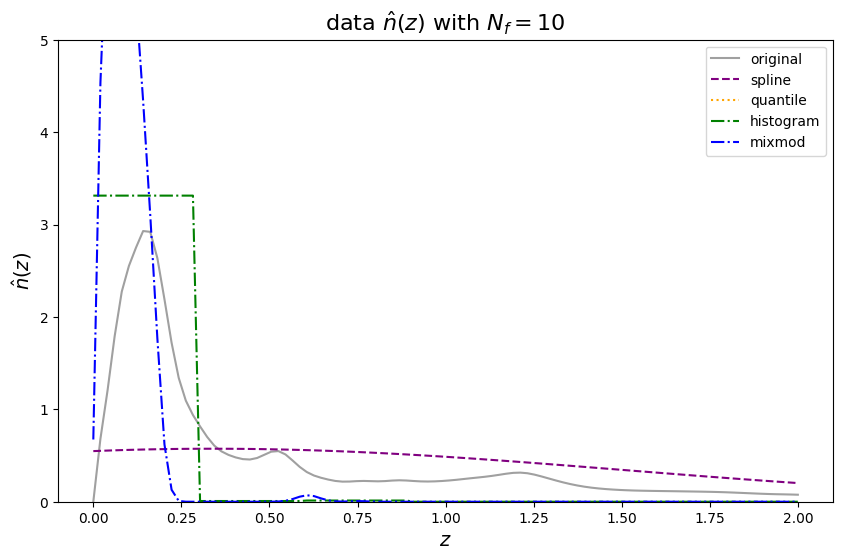

In [178]:
##define redshift values
redshiftValues = np.linspace(0, 2.0, 100)

##calculate stacked estimator for each ensemble
true_pdfs = np.array([ens.pdf(z) for z in redshiftValues])
hist_pdfs = np.array([ens_h10.pdf(z) for z in redshiftValues])
spline_pdfs = np.array([ens_s10.pdf(z) for z in redshiftValues])
quantile_pdfs = np.array([ens_q10.pdf(z) for z in redshiftValues])
mixmod_pdfs = np.array([ens_m10.pdf(z) for z in redshiftValues])

##stack the estimators (mean over all individual PDFs)
true_nz = np.mean(true_pdfs, axis=1)
hist_nz = np.mean(hist_pdfs, axis=1)
spline_nz = np.mean(spline_pdfs, axis=1)
quantile_nz = np.mean(quantile_pdfs, axis=1)
mixmod_nz = np.mean(mixmod_pdfs, axis=1)

##plotting
plt.figure(figsize = (10, 6))

##plotting true pdf
plt.plot(redshiftValues, true_nz, label="original", color='gray', linestyle='-', alpha=0.75)

##plotting all approximations
plt.plot(redshiftValues, spline_nz, label = "spline", color='purple', linestyle='--')
plt.plot(redshiftValues, quantile_nz, label = "quantile", color='orange', linestyle=':')
plt.plot(redshiftValues, hist_nz, label = "histogram", color='green', linestyle='-.')
plt.plot(redshiftValues, mixmod_nz, label = "mixmod", color='blue', linestyle='-.')

## Set the labels and title
plt.xlabel(r'$z$', fontsize=14)
plt.ylabel(r'$\hat{n}(z)$', fontsize=14)
plt.title(r'data $\hat{n}(z)$ with $N_f = 10$', fontsize=16)

## Add the legend
plt.legend()

## Set the y-axis limit
plt.ylim(0, 5)

## Show plot
plt.show()